# MSDS7331 Lab 2 

## <font color=blue>  Telecom Customer Churn Data Mining</font> 

### Team Member Names:
- Name 1: Elisabet Zidow
- Name 2: Adarsh Kannan
- Name 3: Sunna Quazi
- Name 4: Mooyoung Lee

# <span style="color:red"> Report Structure </span>
### <span style="color:red"> There are separate analysis for classification and regression.  Each analysis will include all report categories from the 'data preperation' to the 'deployment' since all inputs and outputs are different. 
</span>

# <span style="color:red"> Analysis 1: Classification </span>

# <span style="color:red"> Data Preparation Part 1 </span>

# <font color=blue>The Telecom Dataset</font>

#### The dataset we chose is entitled "Telecom_Customer Churn" and is available for download at  https://www.kaggle.com/abhinav89/telecom-customer/data. Although descriptive information regarding this dataset is relatively sparse, additional information regarding this dataset can be found at: http://m.library2.smu.ca/bitstream/handle/01/22018/yu_wei_masters_2005.PDF?sequence=1. 

### As there are 100 customer attributes in this dataset the data will need to be trimmed down to 15 variables in order to run models and analysis. The attributes fall loosely into the categories of quality issues, billing rate issues, and behavioral indicators that may demonstrator either “stickiness” or a willingness to churn. The variance over all the attributes is very high and it also includes 21 categorical attributes that will need to be manipulated so they can be weighted against the numerical attributes so we can determine which are most valuable in predicting specific tasks.

### The two tasks we will explore are:
> ### Probability for a customer to churn based on their attributes- this is essential for any telecom business because it demonstrates whether a company can retain it's customer. The churn value is binary and is indicated as 1 if the customer leaves their service provider.
> ### Probability for a customer to change in the amount of revenue they generate- this is an independent query from churn because it is possible for a customer to generate higher or lower revenue regardless of how long they stay with a service provider. This is essential for determining what business model a Telecom provider wants to follow- whether they want to maintain long term subscribers like a Verizon or an AT&T, or if they want to focus their efforts on obtaining subscribers from other providers in burst like Sprint or T-mobile. 


### Data Loading and Checking

The CSV file is imported using pandas below.  21 (categorical) attributes are loaded as object which indicate that the contents are string values. 79 attributes have numerical values.   

In [1]:
# load the dataset and packages
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
import matplotlib.pyplot as plt

df = pd.read_csv('Telecom_customer churn.csv') # read in the csv file

df.head()

rev_Mean  mou_Mean  totmrc_Mean  da_Mean  ovrmou_Mean  ovrrev_Mean  \
0   23.9975    219.25       22.500   0.2475         0.00          0.0   
1   57.4925    482.75       37.425   0.2475        22.75          9.1   
2   16.9900     10.25       16.990   0.0000         0.00          0.0   
3   38.0000      7.50       38.000   0.0000         0.00          0.0   
4   55.2300    570.50       71.980   0.0000         0.00          0.0   

   vceovr_Mean  datovr_Mean  roam_Mean  change_mou     ...       forgntvl  \
0          0.0          0.0        0.0     -157.25     ...            0.0   
1          9.1          0.0        0.0      532.25     ...            0.0   
2          0.0          0.0        0.0       -4.25     ...            0.0   
3          0.0          0.0        0.0       -1.50     ...            0.0   
4          0.0          0.0        0.0       38.50     ...            0.0   

   ethnic  kid0_2  kid3_5  kid6_10  kid11_15  kid16_17  creditcd  eqpdays  \
0       N       U       U        U         U         U         Y    361.0   
1       Z       U       U        U         U         U         Y    240.0   
2       N       U       Y        U         U         U         Y   1504.0   
3       U       Y       U        U         U         U         Y   1812.0   
4       I       U       U        U         U         U         Y    434.0   

   Customer_ID  
0      1000001  
1      1000002  
2      1000003  
3      1000004  
4      1000005  

[5 rows x 100 columns]

In [2]:
# Data Frame Size
df.shape

(100000, 100)

# <font color=blue>Data Preparation Procedure</font>

### The following process will be performed in order to reduce the number of predictors from a new dataset with 100+ attributes.  This process will help to rank all of the attributes including the newly transformed categorical attributes.  The objective of this process is finding the attributes that is highly associated with the churn values so that we can examine those important attributes first.

### 1. Categorical attributes will be converted into numerical form if possible.
### 2. All categorical attributes that cannot be converted into numerical form will be transformed into dummy variables.
### 3. The independence of each individual categorical attribute from the 'churn' will be determined using Chi-Square test.
### 4. The following new variables will be added as discussed in the above steps: 'area_longitude' ,  'area_latitude' , 'kidTotMin'


## 1. The Issue with Categorical Attributes:

The overall premise of trimming our dataset requires us to remove attribues that have low value for each specific task; however, the appearence of the 21 categorical attributes prevents us from directly comparicing them to the rest of our numerical attributes. We cannot in good faith ignore these attributes and focus only on the bulk of our numerical ones, because they may have high influential value on our tasks.

As such, we must proceed with a deep dive into the nature of these attributes.  

In [3]:
# data frame with only string data
df_obj = df.loc[:, df.dtypes == object]
col_list_obj = list(df_obj)
obj_len = len(col_list_obj) # number of object attributes
print("Number of Categorical Attributes = ", obj_len)

Number of Categorical Attributes =  21


### Levels of Categorical Variables

#### Most of the attributes shows only two or three levels.  The attributes with large number of levels are as follows:

- 'CRCLSCOD' : Credit class code
- 'AREA' : Geographic area
- 'DWLLSIZE' : Dwelling size
- 'ETHNIC' : Ethnicity roll-up code

#### The following attributes can be converted into numerical attributes since they have only two levels:
- 'asl_flag' : Account spending limit (N/Y)
- 'refurb_new' : Handset: refurbished or new (N/R)
- 'ownrent' : Home owner/renter status (O/R)
- 'dwlltype' : Dwelling unit type (S/M)
- 'infobase' : InfoBase match (M/N)
- 'kid0_2'   : Child 0 - 2 years of age in household (U/Y)
- 'kid3_5'   : Child 3 - 5 years of age in household (U/Y)
- 'kid6_10'  : Child 6 - 1 0 years of age in household (U/Y)
- 'kid11_15' : Child 11- 15 years of age in household (U/Y)
- 'kid16_17' : Child 16- 17 years of age in household (U/Y)
- 'creditcd' : Credit card indicator (Y/N)

#### 'dwllsize' attribute has 15 levels from A to O.  Based on the frequency distribution, it can be converted into numerical values from 1 (A) to 15 (O) accordingly. 

#### 'infobase' attribute needs its frequency checked since only one out of two levels is dominant.  This attribute can be removed if the small frequency level is negligible. 

# 2.  The rest of categorical variables will be transformed into numerical format using dummy variables. 


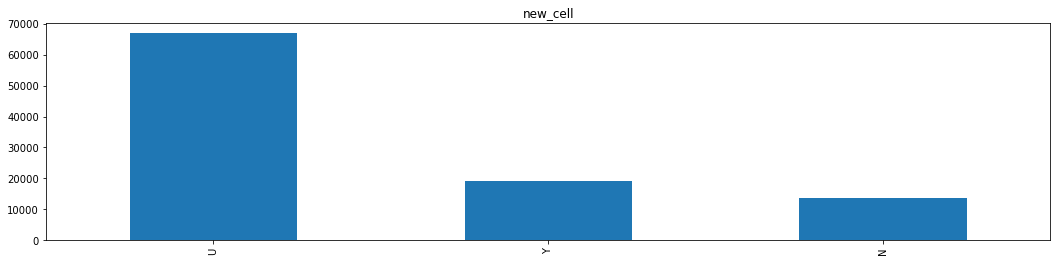

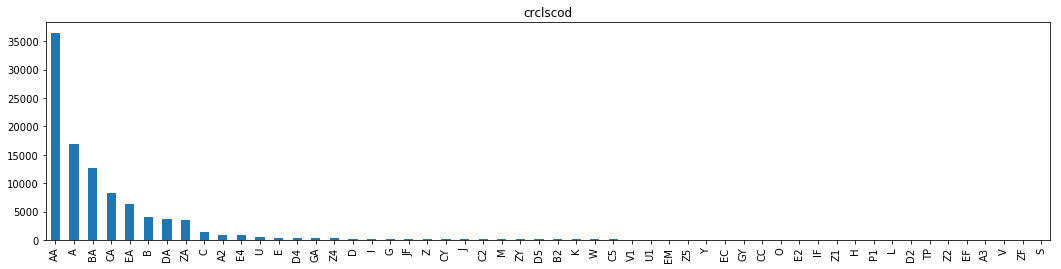

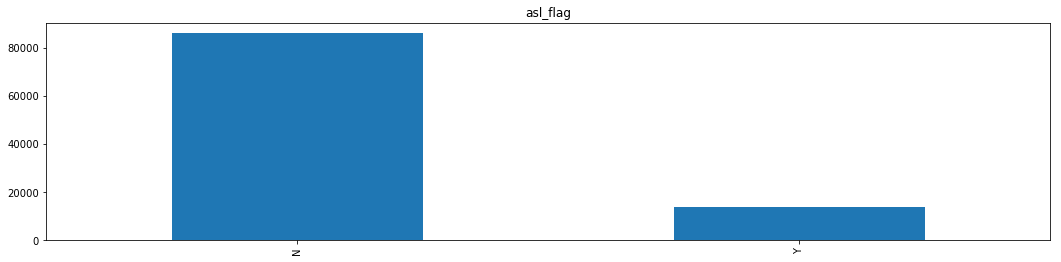

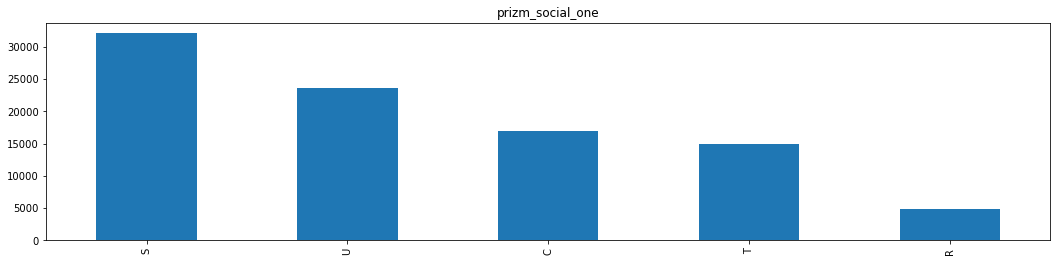

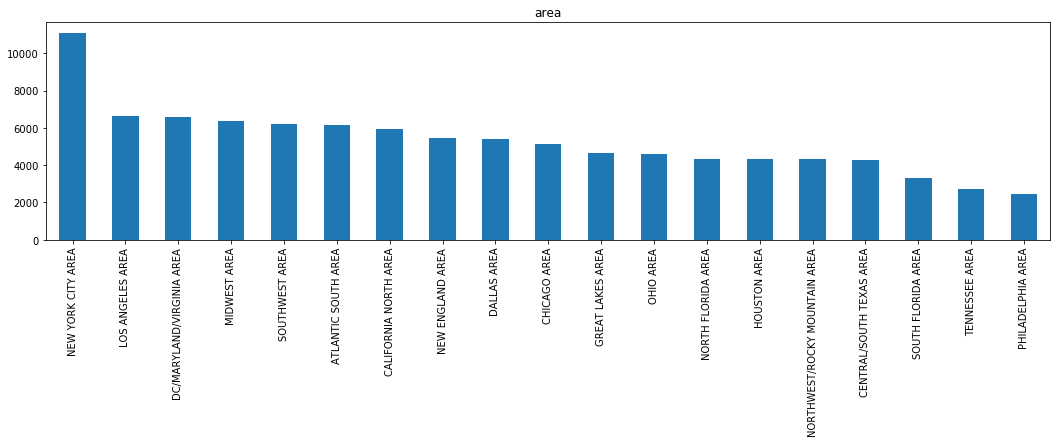

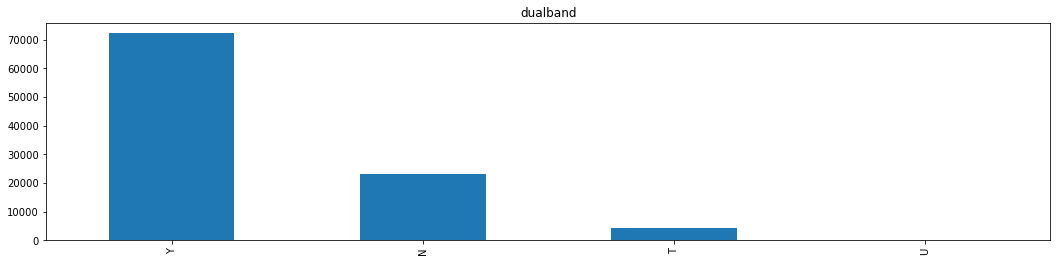

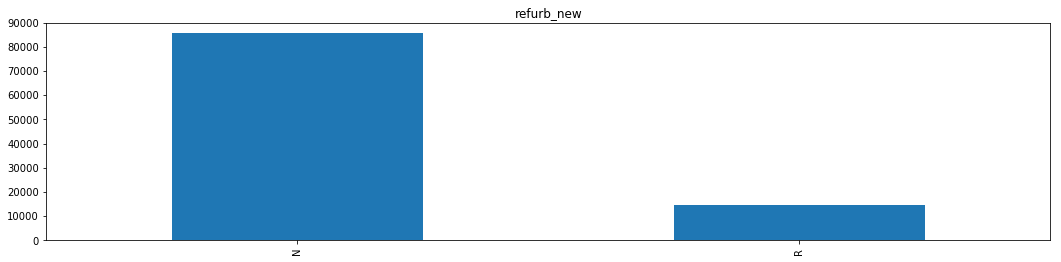

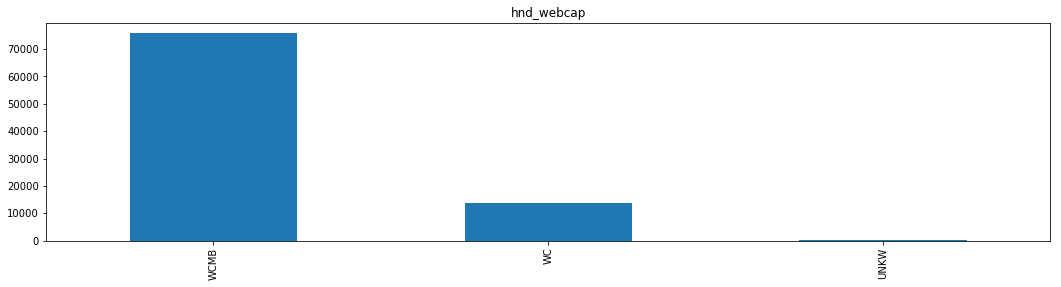

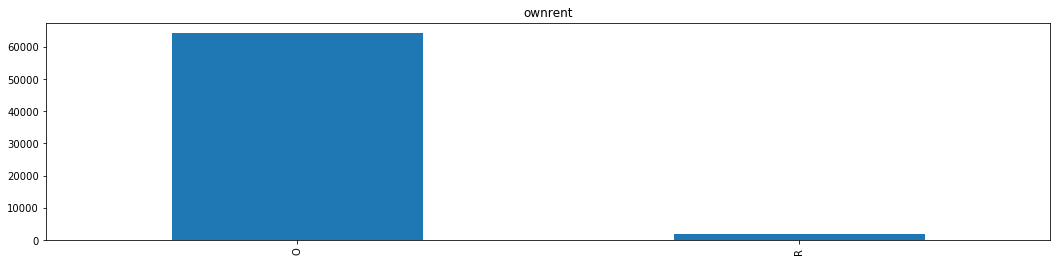

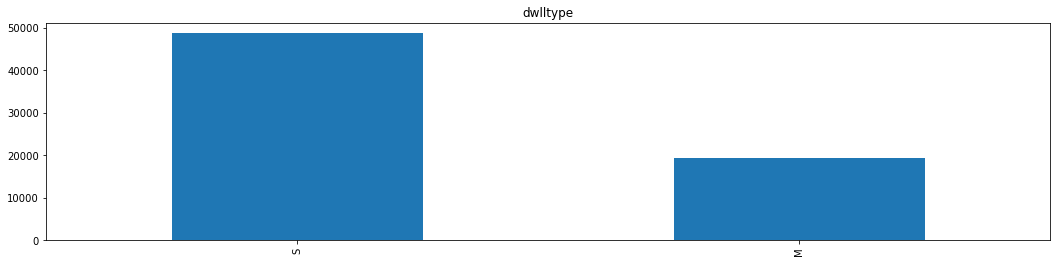

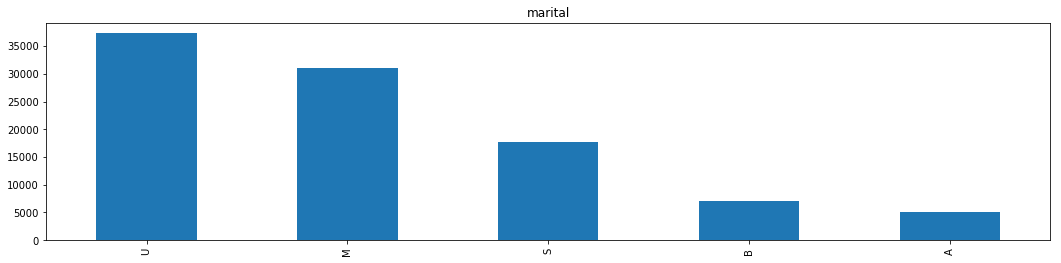

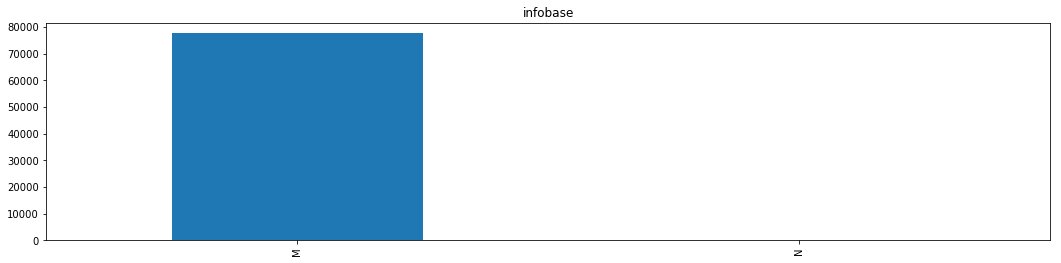

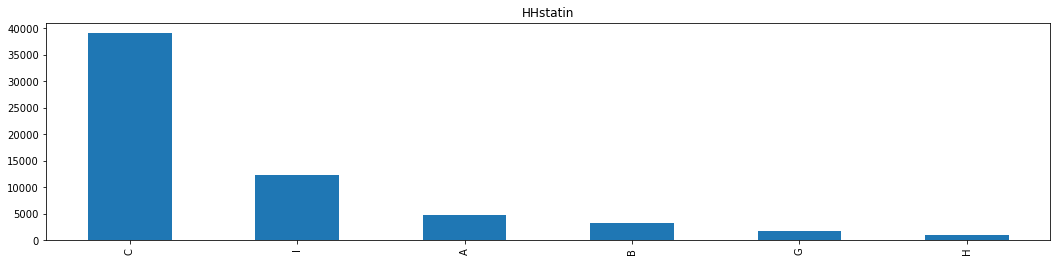

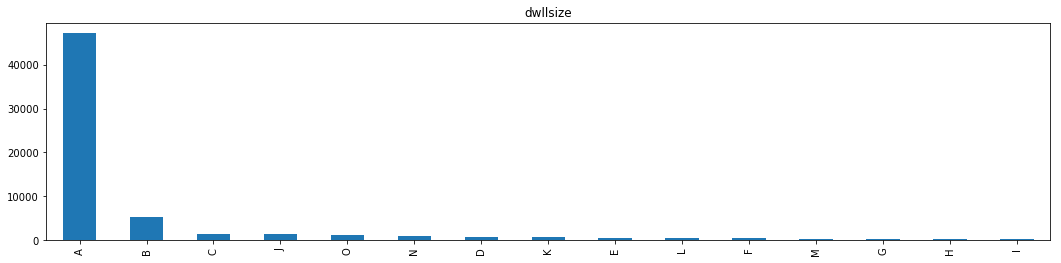

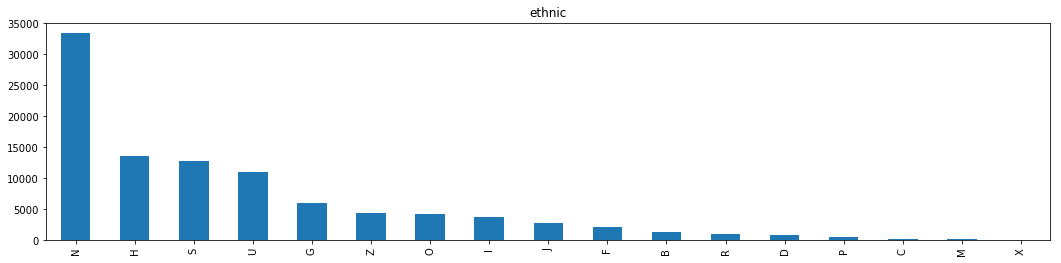

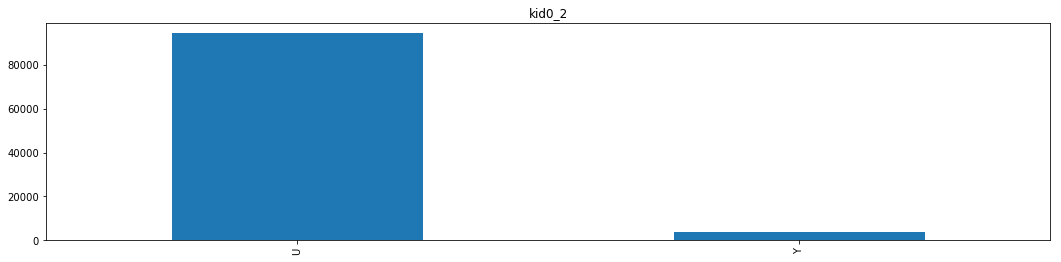

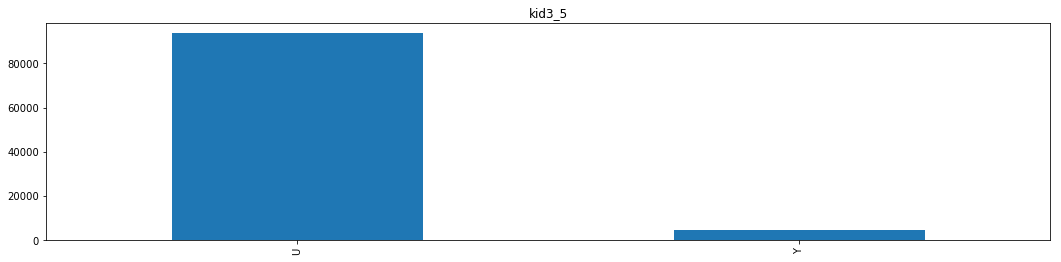

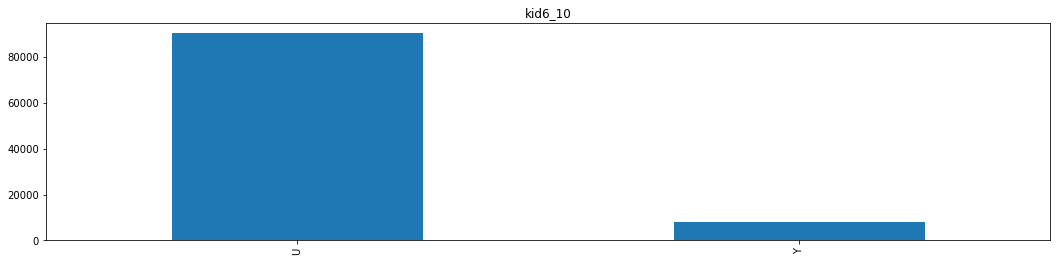

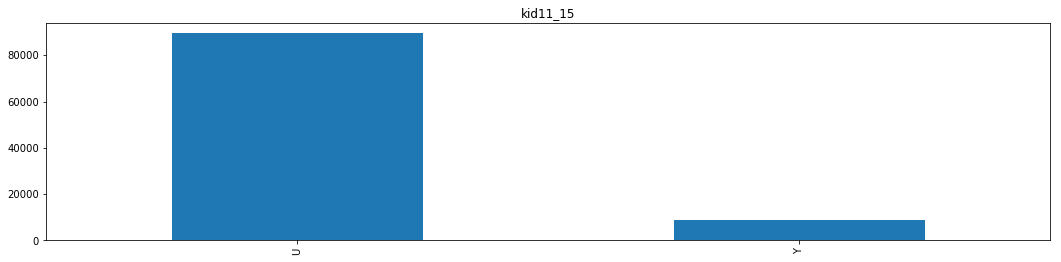

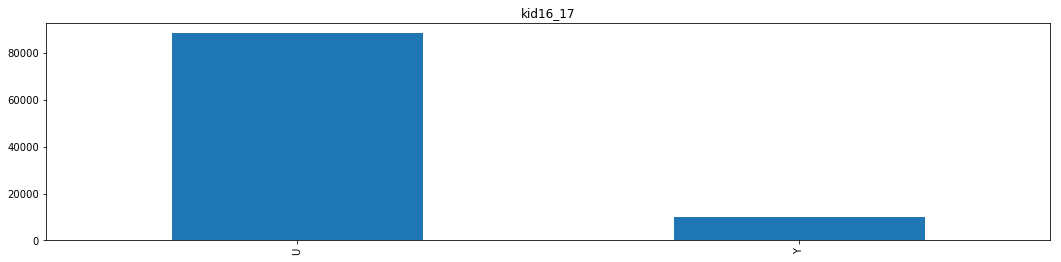

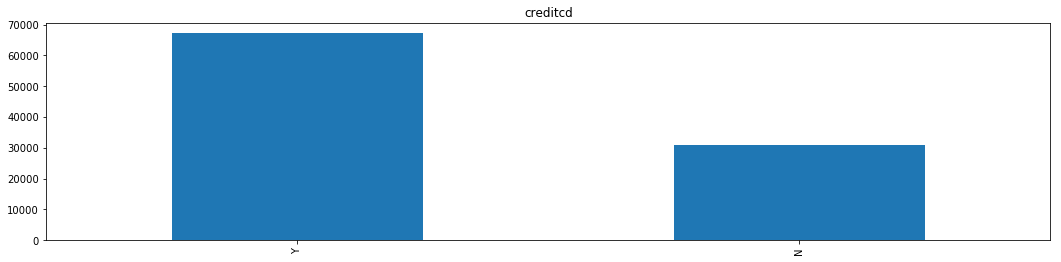

In [4]:
# Frequency plot for Categorical attributes

for i in range(0,21):
    plt.figure(figsize = (18,4))
    ax = df[col_list_obj[i]].value_counts().plot(kind='bar')
    plt.title(col_list_obj[i])
    plt.show()

#### Below, the level frequency shows that more than 99.7% of 'infobase' value is M. This attribute will probably not explain much about the churn so this attribute can be dropped later. 

In [5]:
# Frequency check for 'infobase' levels

print(' InfoBase Levels : \n', df['infobase'].value_counts())
print('\n Churn Levles : \n', df['churn'].value_counts())

 InfoBase Levels : 
 M    77697
N      224
Name: infobase, dtype: int64

 Churn Levles : 
 0    50438
1    49562
Name: churn, dtype: int64


# 3.  Chi-Square Independence Test 

#### Objective: Check categorical variables to see if they are highly associated with 'churn' value.

#### All 21 categorical variables are tested to see if there is a significant association with 'churn' values. Attributes are sorted by p-value so the top attributes have more association with 'churn' values. 

In [6]:
# Chi-Square Test to check the independence from 'churn'
# Output: Attribute name and Chi-square p-values

import scipy.stats as scs
from scipy.stats import chi2_contingency

def chisq_of_df_cols(df, c1, c2):
    groupsizes = df.groupby([c1, c2]).size()
    ctsum = groupsizes.unstack(c1)
    # fillna(0) is necessary to remove any NAs which will cause exceptions
    return(chi2_contingency(ctsum.fillna(0)))

p_value = np.zeros(obj_len) # zero vector with the number of categorical attributes

# Collecting Chi-square test p-values for all categorical attributes vs. 'churn'
for i in range(0,obj_len):
    chiOut = chisq_of_df_cols(df, 'churn', col_list_obj[i])
    p_value[i] = chiOut[1]

# print(p_value)
# col_list_obj_np = np.array(col_list_obj)
# pValSig = np.ix_(p_value < 0.01) # Index of p-value that is very significant
# print('Attributes having Chi-Square P-value less than 0.01 = ', col_list_obj_np[pValSig])

# Print Attribute name and Chi-square p-values in a ascending order
Chi2_Result = pd.DataFrame({'Attribute' :col_list_obj,'p-value':p_value})
Chi2_Result = Chi2_Result.sort_values(by = 'p-value', axis = 0, ascending = True)
Chi2_Result = Chi2_Result.reset_index(drop = True)
print(Chi2_Result)

# Source of def "chisq_of_df_cols" <https://codereview.stackexchange.com/questions/96761/chi-square-independence-test-for-two-pandas-df-columns>

           Attribute        p-value
0           asl_flag  6.909458e-107
1           crclscod  7.984365e-106
2         hnd_webcap   3.603129e-90
3             ethnic   2.002684e-79
4           dualband   8.328702e-63
5               area   8.530675e-47
6         refurb_new   9.965157e-24
7            marital   1.048883e-16
8   prizm_social_one   6.990531e-09
9           creditcd   1.449249e-07
10          infobase   2.830622e-06
11          dwlltype   5.457283e-04
12            kid0_2   2.473489e-03
13           ownrent   4.775968e-03
14          HHstatin   3.978302e-02
15            kid3_5   1.455319e-01
16          kid16_17   1.888888e-01
17          dwllsize   2.008008e-01
18          new_cell   2.557010e-01
19          kid11_15   2.785074e-01
20           kid6_10   5.144683e-01


#### A heatmap is generated below to check the above independence visually.  Only top five significant attributes are plotted with churn values.  There were no drastic differences, but the frequency counts show about 5% differences in some instances. 

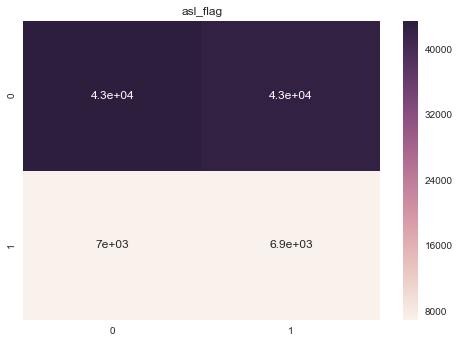

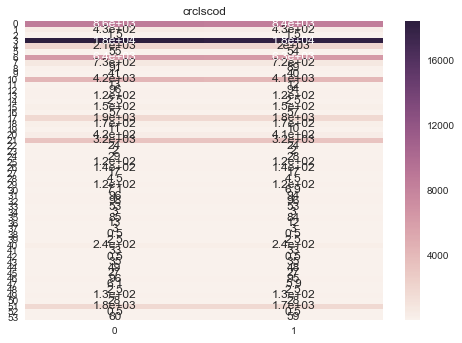

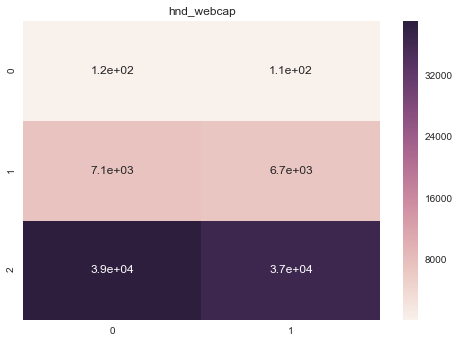

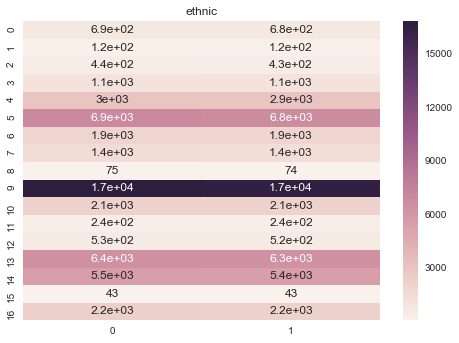

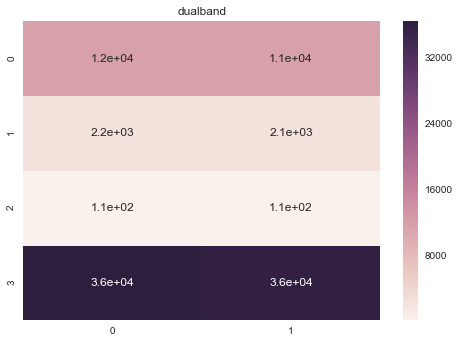

In [7]:
# Contingency table for the Top 5 most significant attributes in independence with 'Churn' 
    # Numbers in the heatmap = frequency,  
    # low = levels of the table name attribute,  
    # Column = levels from 'churn'

import seaborn as sns 

for i in range(0,5):
    chiOut = chisq_of_df_cols(df, 'churn', Chi2_Result.loc[i][0])
    sns.heatmap(chiOut[3], annot = True)
    plt.title(Chi2_Result.loc[i][0])
    plt.show()

#### The bar charts below are utilized to visualize the frequency differences more clearly. 

The account spending limit (N/Y) ratio with churn(0/1) shows some difference.  It can be speculated that those who do not need the spending limit have more disposable income for handset communication so they tend to churn easily than those who have a spending limit.  

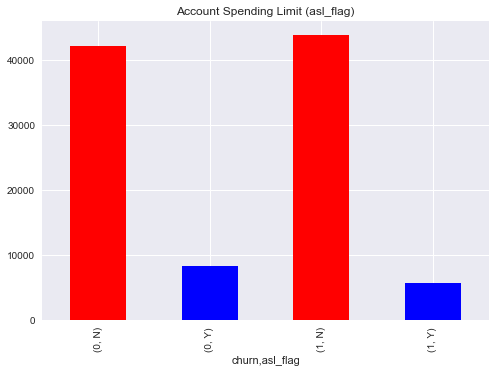

In [8]:
# Bar Plot group by 'churn' for the significant categorical attributes
# Example Histogram by 'Churn' group for 'Account Spending Limit (asl_flag)'

# Data Frame Group by 'Churn'
df_churn = df.groupby(['churn'])

# bar churn vs. asl_flag
ax = df_churn.asl_flag.value_counts().plot(kind='bar', color = ['red', 'blue'], stacked = True)
plt.title('Account Spending Limit (asl_flag)')
plt.show()

#### Ethnic groups, geographic area, marital status, and households having kids 0-2 years old is also checked.  The frequency distributions are almost the same for each churn levels.  By visual inspection, there is no level that shows more than 10% differences in frequency for corresponding levels. 

There are 5 different age groups for kids.  'kid0_2' has the highest p-value from the chi-square test.  It is assumed that a family with having a new born baby will have no energy and money so they will less likely churn; however, the frequency table above shows that families that switched have more kids between the ages of 0 and 2, which is counterintuitive to what we had assumed.  

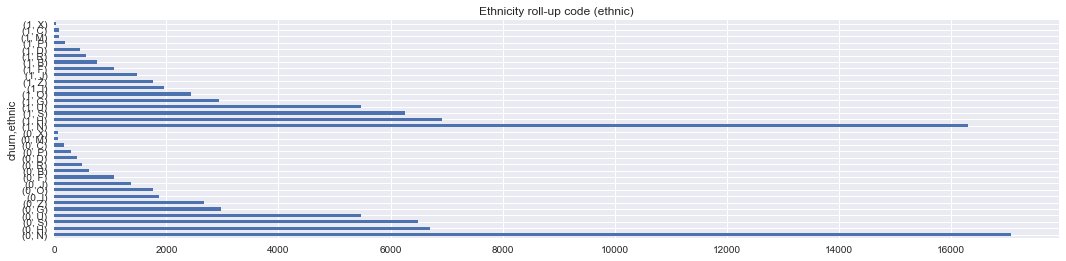

In [9]:
# Bar Plot group by 'churn' for the significant categorical attributes
# Example Histogram by 'Churn' group for 'Ethnic'

plt.figure(figsize = (18,4))
ax = df_churn.ethnic.value_counts().plot(kind='barh')
plt.title('Ethnicity roll-up code (ethnic)')
plt.show()

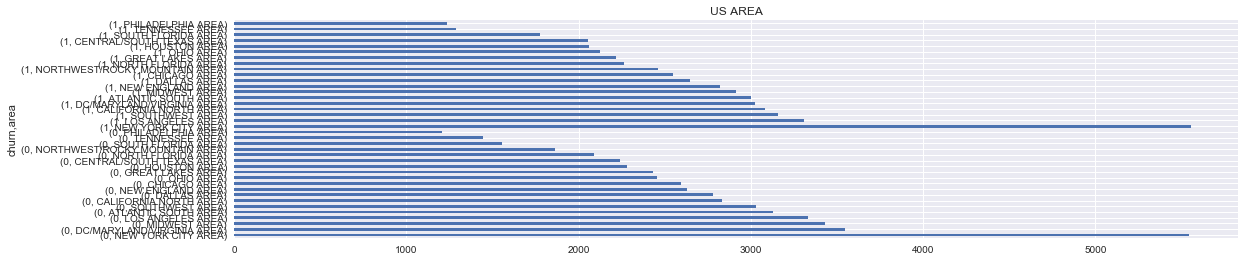

In [10]:
# Bar Plot group by 'churn' for the significant categorical attributes
# Example Histogram by 'Churn' group for 'Ethnic'

plt.figure(figsize = (18,4))
ax = df_churn.area.value_counts().plot(kind='barh')
plt.title('US AREA')
plt.show()

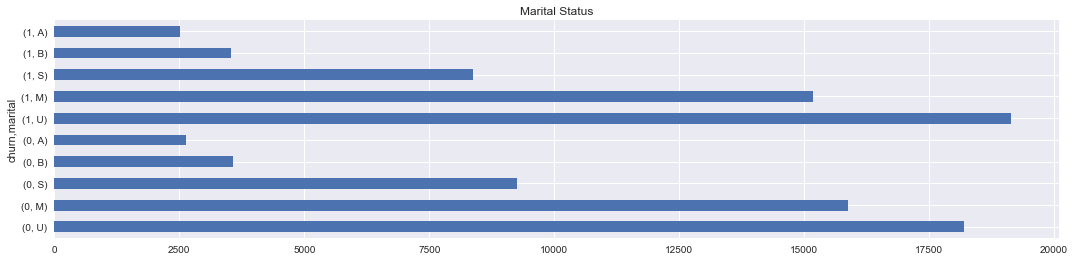

In [11]:
# Bar Plot group by 'churn' for the significant categorical attributes
# Example Histogram by 'Churn' group for 'Ethnic'

plt.figure(figsize = (18,4))
ax = df_churn.marital.value_counts().plot(kind='barh')
plt.title('Marital Status')
plt.show()

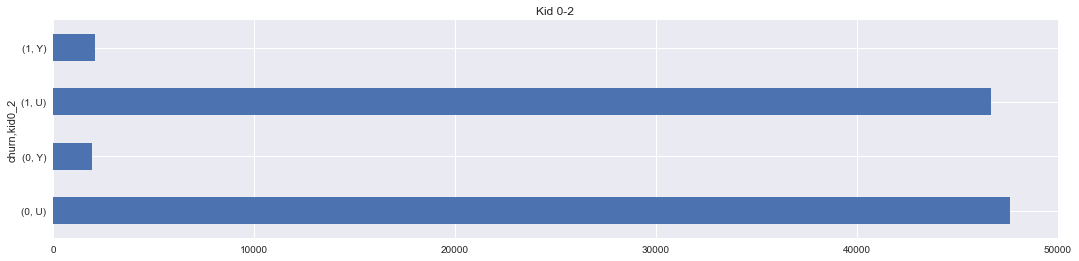

In [12]:
# Bar Plot group by 'churn' for the significant categorical attributes
# Example Histogram by 'Churn' group for 'Ethnic'

plt.figure(figsize = (18,4))
ax = df_churn.kid0_2.value_counts().plot(kind='barh')
plt.title('Kid 0-2')
plt.show()

### Chi-Square Independence Test Result

Under the test assumptions:
1. Expected frequency for each cell of a contingency table is greater than 5.
2. Samples are independent

This independence test is performed to check the association between 'churn' and each categorical attributes. The null hypothesis is that the 'churn' is independent from another variable that is being tested. Only the p-value is checked since the chi-square value itself is not revealing much information.  The 21 categorical variables are sorted with the lowest p-values.  The most significant five variables are:

- asl_flag : Account spending limit
- crclscod : Credit class code
- hnd_webcap : Handset web capability
- ethnic : Ethnicity roll-up code
- dualband : Dualband (Useful when visit other countries having different frequencies)

In [13]:
#1. Convert categorical attributes into numerical

df2 = df
df2.asl_flag = df2.asl_flag.replace(['N', 'Y'], [0, 1])
df2.refurb_new = df2.refurb_new.replace(['N', 'R'], [0, 1])
df2.ownrent = df2.ownrent.replace(['R', 'O'], [0, 1])
df2.dwlltype = df2.dwlltype.replace(['S', 'M'], [0, 1])
df2.infobase = df2.infobase.replace(['N', 'M'], [0, 1])
df2.kid0_2 = df2.kid0_2.replace(['U', 'Y'], [0, 1])
df2.kid3_5 = df2.kid3_5.replace(['U', 'Y'], [0, 1])
df2.kid6_10 = df2.kid6_10.replace(['U', 'Y'], [0, 1])
df2.kid11_15 = df2.kid11_15.replace(['U', 'Y'], [0, 1])
df2.kid16_17 = df2.kid16_17.replace(['U', 'Y'], [0, 1])
df2.creditcd = df2.creditcd.replace(['N', 'Y'], [0, 1])
df2.dwllsize = df2.dwllsize.replace(['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O'], [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])

In [14]:
#2. Transform into dummy variable

df_dummy = pd.get_dummies(df2)
df_dummy.shape

(100000, 207)

## New Attributes

#### 'area' attribute has 19 different areas in US.  It may be interesting to convert the area name with longitude and latitude attributes so that it may reveal some hidden information about the location. For example, warmer or coastal area can churn less or more. As a result of this 'area_longitude' and 'area_latitude' attributes will be generated.

#### "kidTotMin" attribute can be created by adding all 'kid*' attributes.  This will not represent the total number of kids exactly since multiple kids can be present in one age bracket.  However, this new attribute will give the minimum number of kids in a household.  This attribute may be important since it may be hard to churn with multiple family members/dependents.  

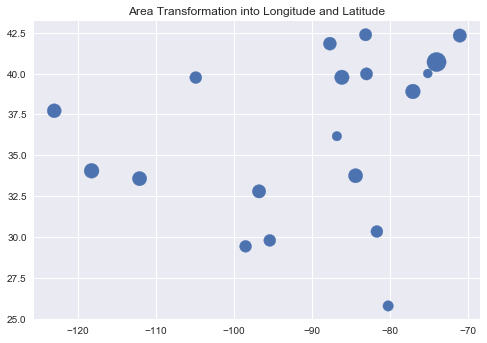

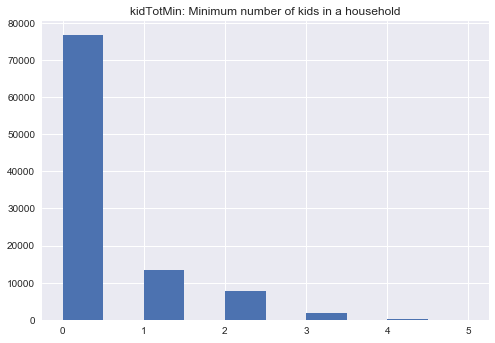

In [15]:
#3. Add new attributes

# 'area_longitude', and 'area_latitude' attributes

area = ['NEW YORK CITY AREA','LOS ANGELES AREA','DC/MARYLAND/VIRGINIA AREA','MIDWEST AREA','SOUTHWEST AREA','ATLANTIC SOUTH AREA','CALIFORNIA NORTH AREA','NEW ENGLAND AREA','DALLAS AREA','CHICAGO AREA','GREAT LAKES AREA','OHIO AREA','NORTH FLORIDA AREA','HOUSTON AREA','NORTHWEST/ROCKY MOUNTAIN AREA','CENTRAL/SOUTH TEXAS AREA','SOUTH FLORIDA AREA','TENNESSEE AREA','PHILADELPHIA AREA']
latitude = [40.7128,34.0522,38.9072,39.7767,33.5722,33.749,37.7272,42.332,32.7933,41.8376,42.383,39.9852,30.3321,29.7866,39.7619,29.4241,25.7752,36.1718,40.0094]
longitude = [-74.0059,-118.2437,-77.0369,-86.1459,-112.0901,-84.388,-123.0322,-71.0202,-96.7665,-87.6818,-83.1022,-82.9848,-81.6556,-95.3909,-104.8811,-98.4936,-80.2086,-86.785,-75.1333]

df_dummy['area_longitude'] = df.area.replace(area,longitude)
df_dummy['area_latitude'] = df.area.replace(area,latitude)

plt.scatter(longitude, latitude, s = df_dummy['area_longitude'].value_counts()/30) # verifying lng/lat information
plt.title('Area Transformation into Longitude and Latitude')
plt.show()

# 'kidTotMin' attribute
df_dummy['kidTotMin'] = df_dummy[['kid0_2','kid3_5','kid6_10','kid11_15','kid16_17']].sum(axis = 1)
plt.hist(df_dummy.kidTotMin)
plt.title('kidTotMin: Minimum number of kids in a household') # verifying number kids distribution
plt.show()

### Modified Dataset 

#### Remove 'Customer_ID' attributes and Null instances

- 'Customer_ID' attribute is removed since it looks like the ID is assigned after the data is collected. 

- Rows having null values are dropped from the data frame.

In [16]:
# Preparation for Feature Selection

# Dropping 'Customer_ID' 
if 'Customer_ID' in list(df_dummy):
    df_dummy = df_dummy.drop('Customer_ID', axis = 1)
    
df_dummy_NaN = df_dummy.dropna()

if 'churn' in list(df_dummy_NaN):
    df_dummy_NaN_noChurn = df_dummy_NaN.drop('churn', axis = 1)
else:
    df_dummy_NaN_noChurn = df_dummy_NaN
    
print('dataset without ''churn''  =', df_dummy_NaN_noChurn.shape)

dataset without churn  = (40166, 208)


## <span style="color:red"> Feature selection using Feature Importance  </span>

<span style="color:red"> 5 different feature_importance values are found from different classifiers, and then the average rank values are used to reduce the number of features from total 208 features. </span>

In [17]:
# Feature Importance from multiple classification algorithms
import time
t = time.time()  # Check Calculation Time

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier


names = [ "Decision Tree", "Random Forest", "AdaBoost", "Extra Random Trees", "Boosted Tree"]

random_state = 1

classifiers = [
    DecisionTreeClassifier(random_state =random_state),
    RandomForestClassifier(random_state =random_state),
    AdaBoostClassifier(random_state =random_state),
    ExtraTreesClassifier(random_state =random_state),
    GradientBoostingClassifier(random_state =random_state)]

X0= preprocessing.scale(df_dummy_NaN_noChurn.as_matrix()) 
y0 = df_dummy_NaN.churn.as_matrix()
col_x_list = list(df_dummy_NaN_noChurn)

# Sampling only 10,000 samples for this process
np.random.seed(1)
sampleRow = np.random.choice(len(X0),10000) # samples row numbers
X = X0[sampleRow,:] # samples for scatter plot 
y = y0[sampleRow]

k = 0

model_score = np.zeros((X.shape[1],len(classifiers)))

for name, clf in zip(names, classifiers):
    
    # training
    clf.fit(X, y)

    # feature importance score
    score = pd.DataFrame({'Attribute': col_x_list, 'Importance': clf.feature_importances_})
    # Add Rank
    score[name] = score['Importance'].rank(ascending = 0)
    
    # Importance Rank Collection
    model_score[:, k] = score.ix[:,2] # Collect prediction outputs
#     print (name, acc.mean())
    k += 1
    

feature_importance = pd.DataFrame(model_score)
feature_importance.columns = names
feature_importance['Features'] = col_x_list
feature_importance['Rank Average'] = feature_importance.mean(axis = 1)

# Final Rank
feature_importance['Total Rank'] = feature_importance['Rank Average'].rank(ascending = 1)
feature_importance_sort = feature_importance.sort_values(by = 'Total Rank', axis = 0, ascending = True)
feature_importance_sort = feature_importance_sort.reset_index(drop = True)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(feature_importance_sort.ix[:,0:5])

elapsed = time.time() - t
print('Elapsed time is ', round(elapsed/60, 1), ' minutes')

     Decision Tree  Random Forest  AdaBoost  Extra Random Trees  Boosted Tree
0              2.0            3.0       1.0                 2.0           1.0
1              1.0            2.0       8.5                 1.0           2.0
2              4.0            1.0       3.5                 5.0           3.0
3             10.0            4.0       3.5                 7.0           7.0
4              6.0            5.0       8.5                22.0           6.0
5              3.0           11.0       8.5                28.0          11.0
6              8.0           35.0       3.5                25.0           5.0
7             12.0           19.0       3.5                44.0           4.0
8             18.0           29.0      22.0                 3.0          19.0
9             14.0           14.0      22.0                35.0           8.0
10            31.0            8.0      22.0                14.0          21.0
11            42.0           10.0      22.0                 8.0 

In [18]:
# Final Rank
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(feature_importance_sort.ix[:,5:8])

                               Features  Rank Average  Total Rank
0                                months           1.8         1.0
1                               eqpdays           2.9         2.0
2                            change_mou           3.3         3.0
3                                avgqty           6.3         4.0
4                         mou_cvce_Mean           9.5         5.0
5                            change_rev          12.3         6.0
6                           totmrc_Mean          15.3         7.0
7                              mou_Mean          16.5         8.0
8                                   lor          18.2         9.0
9                                avgrev          18.6        10.0
10                               totrev          19.2        11.0
11                              avg3mou          19.6        12.0
12                               avgmou          19.8        13.0
13                            hnd_price          20.7        14.0
14        

## <span style="color:red"> Select top 20 important features first </span>

In [19]:
# Select top 20 features

col_list = list(feature_importance_sort.ix[0:19,5])
col_list.append('churn')

df_temp_NaN = df_dummy.loc[:, df_dummy.columns.isin(col_list)].dropna()

y0 = df_temp_NaN.churn

if 'churn' in list(df_temp_NaN):
    X0 = df_temp_NaN.drop('churn', axis = 1)
else:
    X0 = df_temp_NaN

print('dataset without churn  =', X0.shape)

dataset without churn  = (68634, 20)


## <span style="color:red"> Multicollinearity Check  </span>

<span style="color:red"> Collinearity may or may not affect the classification task. ** However, if the coefficient of correlation is greater than 0.85, it is definitely a redundant feature in a model.**  Thus, the features with the coefficient of correlation greater than 0.85 will be removed with the average feature importance rank found above. Below scatter matrix allows to check correlations visually. The scatter plots looking like a straight line show the redundancy in features. </span>

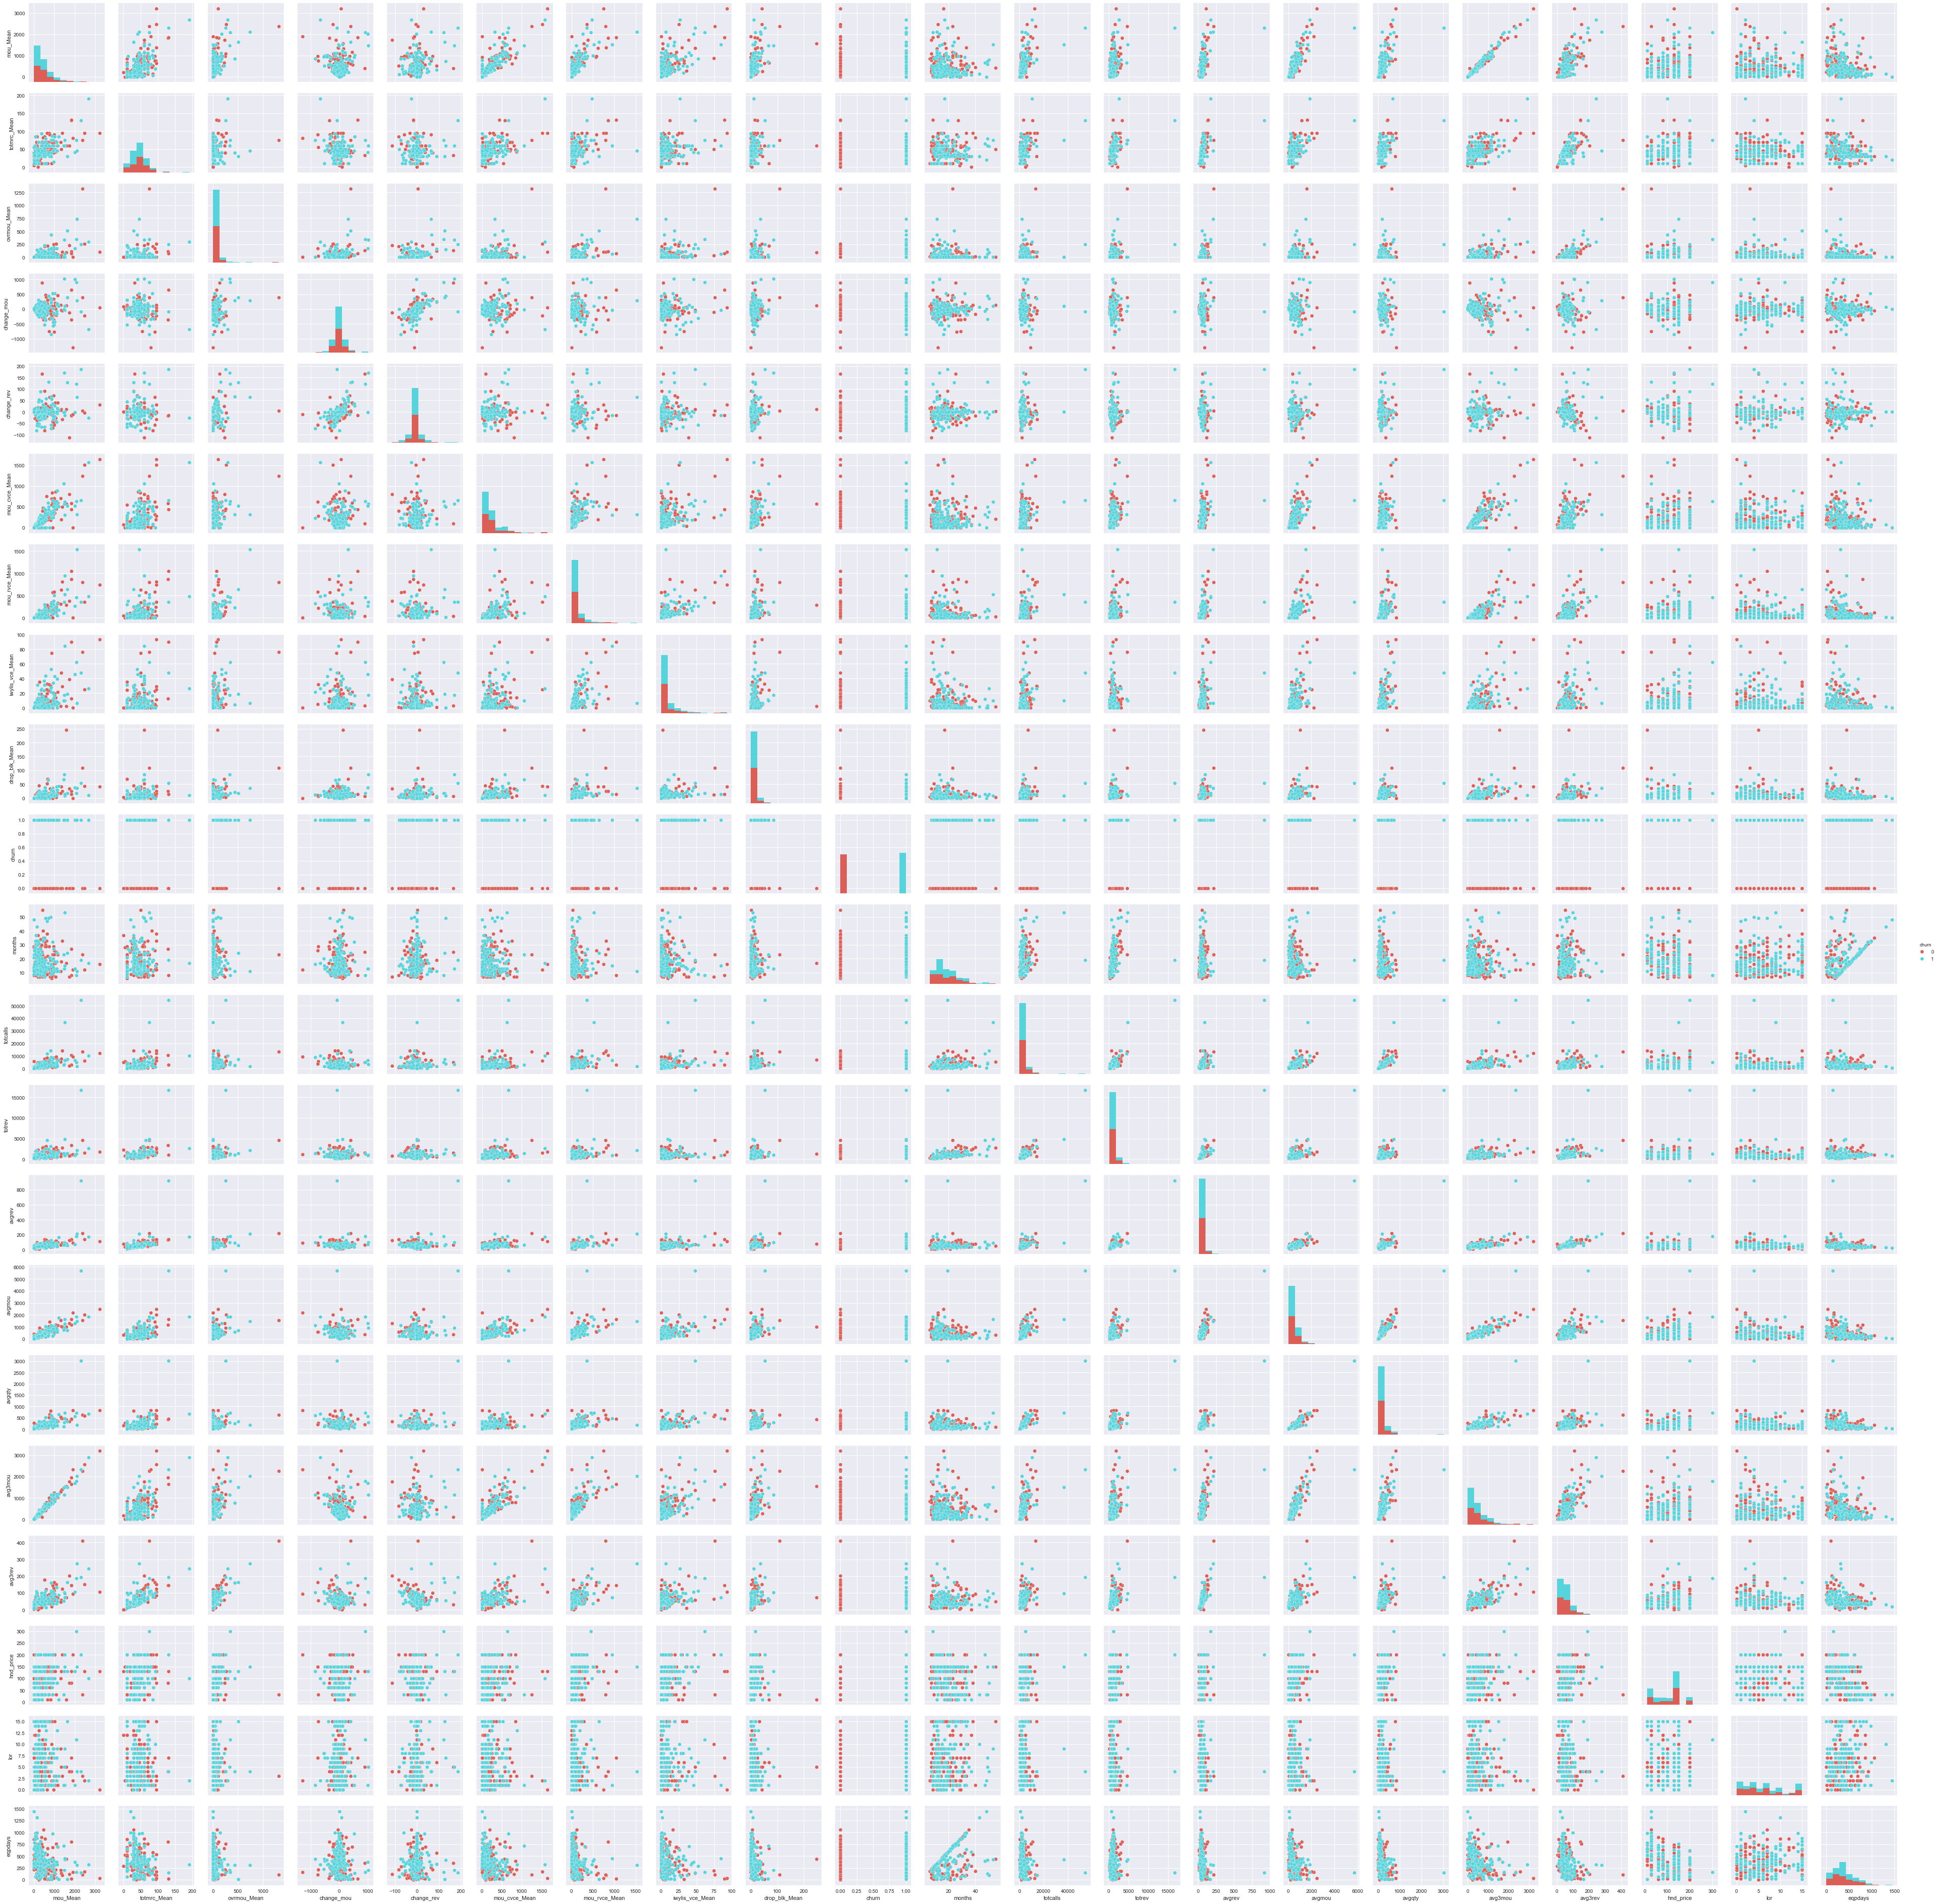

In [20]:
# Scatter Matrix
import seaborn as sns  

# sample values only for scatter plot
sample_scatter = df_temp_NaN.sample(n = 300, random_state = 0, axis = 0)

sns.pairplot(sample_scatter, hue = 'churn', palette = 'hls')
plt.show()

## Features with high correlation coefficient
The list is twice long since the result is not filtered with orders.

In [21]:
# Identifying highly correlated attributes

corr = X0.corr()
HighCorr = corr > .85  # Enter desired corr.coef value as a limit

result = pd.melt(HighCorr.reset_index(), id_vars=['index'])
mask = result['value'] == True
result = result.loc[mask, ['index', 'variable']]
result.columns = [0, 1]
# print(result)

HighCorr_var = result.ix[result.ix[:,0] != result.ix[:,1] ,:]
print(HighCorr_var)
HighCorr_varList = HighCorr_var.ix[:,0]
HighCorr_varList = HighCorr_varList.drop_duplicates()
# print(HighCorr_varList)

                 0              1
5    mou_cvce_Mean       mou_Mean
13          avgmou       mou_Mean
15         avg3mou       mou_Mean
100       mou_Mean  mou_cvce_Mean
115        avg3mou  mou_cvce_Mean
260       mou_Mean         avgmou
274         avgqty         avgmou
275        avg3mou         avgmou
293         avgmou         avgqty
300       mou_Mean        avg3mou
305  mou_cvce_Mean        avg3mou
313         avgmou        avg3mou


## <span style="color:red">  Drop features with high correlation and lower rank

<span style="color:red"> The features are selected manually to drop by comparing the correlation coefficient and the average importance ranking.  

<span style="color:red"> Following features have a high correlation coefficient and lower importance so those will be removed: ['mou_Mean','avg3mou','avgmou'] 

In [22]:
# Drop Features with High Correlation
DropList = ['mou_Mean','avg3mou','avgmou']  # <--- Update attribute names to drop based on the corr.coef and rank values
col_list2 = col_list

for i in DropList:
    col_list2.remove(i)

# Subset from original dataFrame for the selected features

df_dummy_RFE_NaN = df_dummy.loc[:, df_dummy.columns.isin(col_list2)].dropna()

y0 = df_dummy_RFE_NaN.churn

if 'churn' in list(df_dummy_RFE_NaN):
    X0 = df_dummy_RFE_NaN.drop('churn', axis = 1)
else:
    X0 = df_dummy_RFE_NaN

print('dataset without churn  =', X0.shape)

dataset without churn  = (68634, 17)


# <span style="color:red"> Data Preperation Part 2 </span>

## <span style="color:red"> Final dataset for Classification task include 17 features and 68,634 observations.

# Definitions of attribute:

| Final Rank | Attribute       | Average Rank Score | Definition                                                                                                                                                                                                                                                                 |
|------------|-----------------|--------------------|:---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| 1          | months          | 1.8                | length of service in months                                                                                                                                                                                                                                                |
| 2          | eqpdays         | 2.9                | the older the handset, the more likely a person is coming up on the end of a contract period and looking for the next good deal to get a new handset which may not be with their current subscriber                                                                        |
| 3          | change_mou      | 3.30               | (Percentage change in monthly minutes of use vs previous three month average) - This will determine increasing or decreasing usage that will be important as a demonstration of satisfaction. Users that are beginning to lower their usage may be getting ready to churn. |
| 4          | avgqty          | 6.3                | Average monthly number of calls over the life of the customer                                                                                                                                                                                                              |
| 5          | mou_cvce_Mean   | 9.5                | Mean unrounded minutes of use of completed voice calls                                                                                                                                                                                                                     |
| 6          | change_rev      | 12.3               | changes of revenue in dollar in monthly revenue compared with last three month average                                                                                                                                                                                     |
| 7          | totmrc_Mean     | 15.3               | average reoccuring monthly bill                                                                                                                                                                                                                                            |
| 9          | lor             | 18.2               | length of residence                                                                                                                                                                                                                                                       |
| 10         | avgrev          | 18.6               | Average monthly revenue over the life of the customer                                                                                                                                                                                                                      |
| 11         | totrev          | 19.2               | Total Revenue                                                                                                                                                                                                                                                              |
| 14         | hnd_price       | 20.7               | price of handset                                                                                                                                                                                                                                                           |
| 15         | totcalls        | 25.6               | Total number of calls over the life of the customer                                                                                                                                                                                                                        |
| 16         | iwylis_vce_Mean        | 26.8              | Mean number of inbound wireless to wireless voice calls                                                                                                                                                                                                                    |
| 17         | mou_rvce_Mean        | 27.2              | Mean unrounded minutes of use of received voice calls                                                                                                                                                                                                                 |
| 18         | avg3rev         | 27.3               | Average monthly revenue over the previous three months                                                                                                                                                                                                                     |
| 19         | ovrmou_Mean         | 29.4               |Mean overage minutes of use                                                                                                                                                                                                                |
| 20         | drop_blk_Mean   | 29.6             | Mean number of dropped or blocked calls                                                                                                                                                                                                                          |

##  <span style="color:red"> Final dataset for Classifications

In [23]:
X0.describe()

totmrc_Mean   ovrmou_Mean    change_mou    change_rev  mou_cvce_Mean  \
count  68634.000000  68634.000000  68634.000000  68634.000000   68634.000000   
mean      44.893837     37.818104    -12.098163     -0.873129     208.165213   
std       23.251253     92.415819    263.087793     52.079490     247.048489   
min      -26.915000      0.000000  -3331.250000   -851.105000       0.000000   
25%       29.992500      0.000000    -77.250000     -6.192500      43.353333   
50%       43.780000      1.500000     -5.250000     -0.270000     131.483333   
75%       57.074375     37.000000     56.000000      1.310000     280.502500   
max      399.990000   4320.750000  31219.250000   9963.657500    3701.363333   

       mou_rvce_Mean  iwylis_vce_Mean  drop_blk_Mean        months  \
count   68634.000000     68634.000000   68634.000000  68634.000000   
mean      100.131349         7.021360       9.233509     19.608561   
std       153.381444        14.605189      14.448518      9.825440   
min         0.000000         0.000000       0.000000      6.000000   
25%         5.656667         0.000000       1.666667     12.000000   
50%        41.061667         1.666667       5.000000     18.000000   
75%       130.183333         7.666667      11.333333     25.000000   
max      2619.280000       344.666667     420.000000     61.000000   

           totcalls        totrev        avgrev        avgqty       avg3rev  \
count  68634.000000  68634.000000  68634.000000  68634.000000  68634.000000   
mean    2796.565390   1028.920731     54.996912    159.971372     56.604176   
std     3826.830091    850.087833     34.358051    160.432327     44.472283   
min        0.000000      4.350000      0.480000      0.000000      1.000000   
25%      822.000000    517.785000     34.100000     56.322500     32.000000   
50%     1720.000000    804.930000     46.690000    113.740000     45.000000   
75%     3386.750000   1260.430000     65.427500    209.567500     66.750000   
max    98874.000000  27321.500000    924.270000   3017.110000   1239.000000   

          hnd_price           lor       eqpdays  
count  68634.000000  68634.000000  68634.000000  
mean      98.808798      6.173296    411.599499  
std       61.241667      4.733356    264.502789  
min        9.989998      0.000000     -5.000000  
25%       29.989990      2.000000    222.000000  
50%       99.989990      5.000000    358.000000  
75%      149.989990      9.000000    566.000000  
max      499.989990     15.000000   1823.000000

#  <span style="color:red"> Modeling and Evaluation 1

### <span style="color:red"> Modeling Evaluation Metric
<span style="color:red"> We used accuracy as our evaluation metric because not only it is intuitive but also it complements our study. Our task in our classification model is to determine what attributes will lead to churn, and in evaluating this binary value we are only concered with ndifferentiating between a true positive and a true negative.  Since our end goal is to assist telecom companies into delving into data they already have to assist in their decision making to maintain or broaden their customer base, we aren't concerned with false positives that precision would be focused on. Precision  and FPR would be more aptly suited for the ramifications of a false positive are uniquely high, like in medicine. We are also not interested in recall because it is crucial to our analysis to determine who does not churn.

#  <span style="color:red"> Modeling and Evaluation 2

### <span style="color:red"> Dividing our data
<span style="color:red"> We Used ** Stratified 10-fold Cross-Validation** to divide our data into training and testing splits.  K-fold cross-validation randomly partition the original sample into equal sized subsamples. So our 9 subsample will be used to train models and one sample will be used to test the model.  Then the cross-validation will repeat the train and test process for 10 times using all observations once per each fold. We used 10-fold since it is a common number of fold to have some confidence in the output of a model.  Then for the stratified fold, the mean response values are about equal because stratified fold force and choose to have balanced response values.  This technique is good for the classification tasks since classification can easily affected by the over- or under-representation of classes. 

#  <span style="color:red"> Modeling and Evaluation 3

### <span style="color:red"> Classification Modeling Procedure

<span style="color:red"> - Three classifiers will be selected with a preliminary test

<span style="color:red"> - Classifier hyperparameters will be optimized to have the highest accuracy

<span style="color:red"> - Final accuracy values will be calculated with a stratified 10-fold cross-validation.

## <span style="color:red"> Preliminary classifier selection

<span style="color:red"> Gradient Boosting classifier (Boosted Tree) showed the highest accuracy from this test so this classifier will be used to represent ensemble library. Extra Trees and Random Forest classifiers are also selected because they also showed high accuracy values. The minimum expected classification accuracy after hyperparameter optimization will be about 60% based on this test. 

In [24]:
# Classification Algorithm
import time
t = time.time()  # Check Calculation Time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import cross_val_score
from sklearn import preprocessing

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA", "Extra Random Trees", "Boosted Tree"]

# Default parameters are used for all algorithms.
classifiers = [
    KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30),
    LinearSVC(C = 1, loss = 'hinge', random_state = 0),
    SVC(kernel = 'rbf', C = 1, gamma = 'auto', random_state = 0),
    GaussianProcessClassifier(random_state = 0),
    DecisionTreeClassifier(criterion = 'gini', max_depth = None, min_samples_leaf=1, random_state = 0),
    RandomForestClassifier(n_estimators=10, criterion='gini', max_depth=None, random_state = 0),
    MLPClassifier(activation='relu', solver='adam', alpha=0.0001, learning_rate='constant', random_state = 0),
    AdaBoostClassifier(n_estimators=50, learning_rate=1.0, algorithm='SAMME.R', random_state = 0),
    GaussianNB(priors=None),
    QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0, tol=0.0001),
    ExtraTreesClassifier(n_estimators=10, criterion='gini', max_depth=None, random_state = 0),
    GradientBoostingClassifier(loss='deviance', learning_rate=0.1, n_estimators=100, random_state = 0)]


# Standardization
X = preprocessing.scale(X0.as_matrix()) 
y = y0.as_matrix()

# Sampling only 10,000 samples for this process
np.random.seed(1)
sampleRow = np.random.choice(len(y0),10000) # samples row numbers
X = X[sampleRow,:] # samples for scatter plot 
y = y[sampleRow]

# Prediction Accuracy
for name, clf in zip(names, classifiers):
    acc = cross_val_score(clf,X,y)
    
    print (name, acc.mean())

elapsed = time.time() - t
print('Elapsed time is ', round(elapsed/60, 1), ' minutes')

Nearest Neighbors 0.558500364753
Linear SVM 0.569801945973
RBF SVM 0.581199846465
Gaussian Process 0.594600167602
Decision Tree 0.584502307222
Random Forest 0.599903668726
Neural Net 0.589399407033
AdaBoost 0.60609870823
Naive Bayes 0.560102205249
QDA 0.560602165281
Extra Random Trees 0.592700727562
Boosted Tree 0.615400869406
Elapsed time is  2.7  minutes


## <span style="color:red"> Classifier Optimization

<span style="color:red"> The hyperparameters of the three classfiers, [DecisionTreeClassifier, ExtraTrees, RandomForest], will be optimized to get the highest accuracy.  Number of trees(n_estimators) and the depth of three(max_depth) will be only changed in order to optimize the classifier performance.  The rest of the parameters of the classifiers will leave as default.  

<span style="color:red"> The accuracy of classifiers will be calculated using 'GridSearchCV' function with all combination of the number of trees and the depth of tree arrays.  The following arrays will be used for the number of trees and the depth of trees accordingly: 'n_estimators':[10, 25, 50, 75, 100, 125], 'max_depth':[5, 10, 15, 20, 25].

<span style="color:red"> The 'GridSearchCV' uses 3-fold cross validation as default.  Stratified-10-fold cross validation for this parameter optimization process seemed unnecessary because there are too many combinations of parameters to run.  However, stratified-10-fold cross validation will be used to calculate the final accuracy once the optimum parameters are found. 

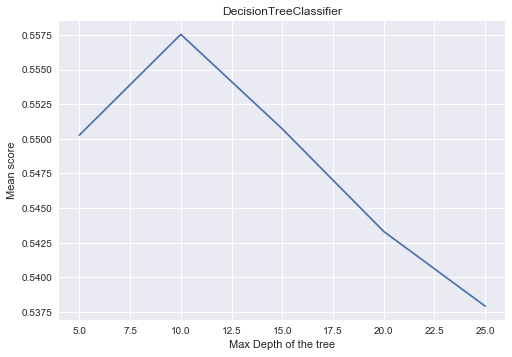

Parameters of  DecisionTreeClassifier  giving the best accuracy :  {'max_depth': 10}


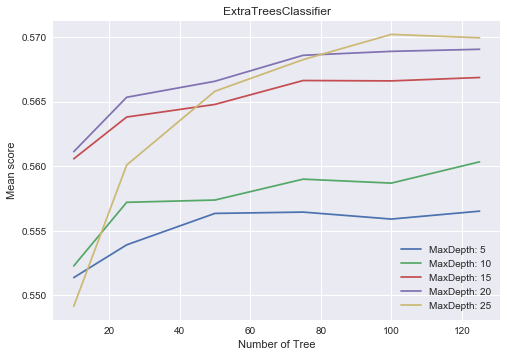

Parameters of  ExtraTreesClassifier  giving the best accuracy :  {'max_depth': 25, 'n_estimators': 100}


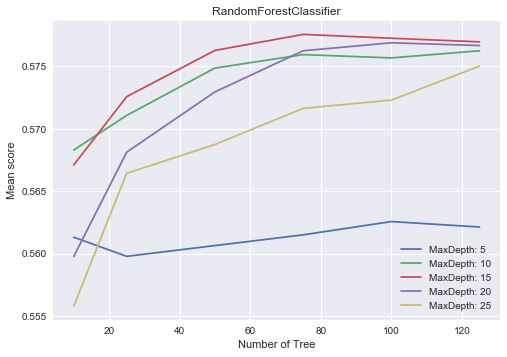

Parameters of  RandomForestClassifier  giving the best accuracy :  {'max_depth': 15, 'n_estimators': 75}


In [25]:

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import ExtraTreesClassifier          
from sklearn.ensemble import RandomForestClassifier          
# from sklearn.ensemble import GradientBoostingClassifier         # runs hours and not finishing
# from sklearn.gaussian_process import GaussianProcessClassifier  # not working w/ gridSearchCV
# from sklearn.gaussian_process.kernels import RBF                # not working w/ gridSearchCV
# from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing


# Data Standardization
X = preprocessing.scale(X0.as_matrix()) 
y = y0.as_matrix()

# list of hyperparameters
parameters0 = {'max_depth': [5, 10, 15, 20, 25]}
parameters = {'n_estimators':[10, 25, 50, 75, 100, 125], 'max_depth':[5, 10, 15, 20, 25]}


names = ['DecisionTreeClassifier', 'ExtraTreesClassifier','RandomForestClassifier']

classifiers = [DecisionTreeClassifier(random_state = 0),
               ExtraTreesClassifier(random_state = 0),
               RandomForestClassifier(random_state = 0)]

for name, clf in zip(names, classifiers):
    
    if name == 'DecisionTreeClassifier':
        gridSearch = GridSearchCV(estimator = clf, param_grid = parameters0) 
    else:
        gridSearch = GridSearchCV(estimator = clf, param_grid = parameters) 
    gridSearch.fit(X, y)

    # reshape 'mean_test_score'
    scores = gridSearch.cv_results_['mean_test_score']
    if name == 'DecisionTreeClassifier':
        scores = np.array(scores)
    else:
        scores = np.array(scores).reshape(len(parameters['max_depth']),len(parameters['n_estimators']))
        
    # plot test score vs. parameters
    if name == 'DecisionTreeClassifier':
        plt.plot(parameters0['max_depth'],scores)
        plt.xlabel('Max Depth of the tree')
        plt.ylabel('Mean score')
        plt.title(name)
        plt.show()
    else:    
        for ind, i in enumerate(parameters['max_depth']):
            plt.plot(parameters['n_estimators'], scores[ind], label='MaxDepth: ' + str(i))
        plt.legend()
        plt.xlabel('Number of Tree')
        plt.ylabel('Mean score')
        plt.title(name)
        plt.show()

    # parameters showing the best score
    rank = gridSearch.cv_results_['rank_test_score']
    rankMin_row = rank.argmin()
    param = gridSearch.cv_results_['params']
    print('Parameters of ', name, ' giving the best accuracy : ',param[rankMin_row])

## <span style="color:red"> Final accuracy values of three classifiers

<span style="color:red"> Stratified 10-fold cross validation will be used to find the average value of accuracies for each classifier.  Receiver operating characteristic(ROC) curves will be printed also to evalue the performance of the classifiers.

DecisionTreeClassifier , Score Average: 
    Accuracy  Conf_TN  Conf_FP  Conf_FN  Conf_TP
0  0.566963   2023.7   1498.4   1473.7   1867.6

Score Standard Deviation: 
    Accuracy     Conf_TN     Conf_FP     Conf_FN     Conf_TP
0  0.033992  404.238556  404.298207  306.218239  306.506835

Elapsed time for  DecisionTreeClassifier  is  0.1  minutes


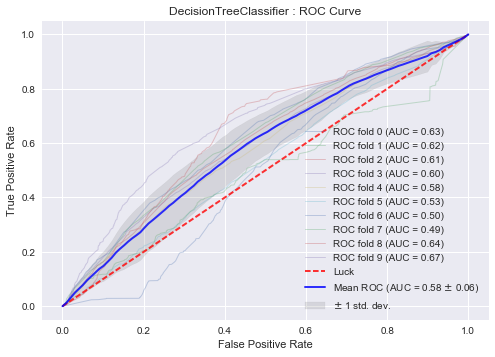

ExtraTreesClassifier , Score Average: 
    Accuracy  Conf_TN  Conf_FP  Conf_FN  Conf_TP
0  0.583442   2081.8   1440.3   1418.7   1922.6

Score Standard Deviation: 
    Accuracy     Conf_TN     Conf_FP     Conf_FN     Conf_TP
0  0.029821  489.371188  489.381048  373.321055  373.561829

Elapsed time for  ExtraTreesClassifier  is  1.2  minutes


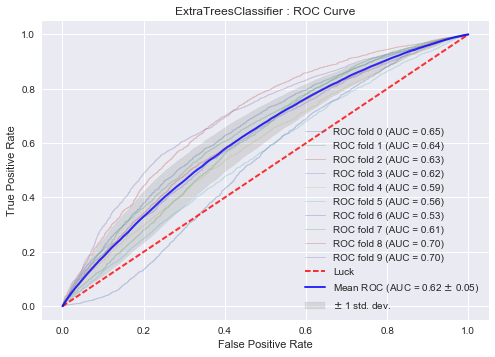

RandomForestClassifier , Score Average: 
    Accuracy  Conf_TN  Conf_FP  Conf_FN  Conf_TP
0  0.588614   2130.3   1391.8   1431.7   1909.6

Score Standard Deviation: 
    Accuracy     Conf_TN     Conf_FP     Conf_FN     Conf_TP
0  0.034423  432.365829  432.371091  327.697132  327.923528

Elapsed time for  RandomForestClassifier  is  2.1  minutes


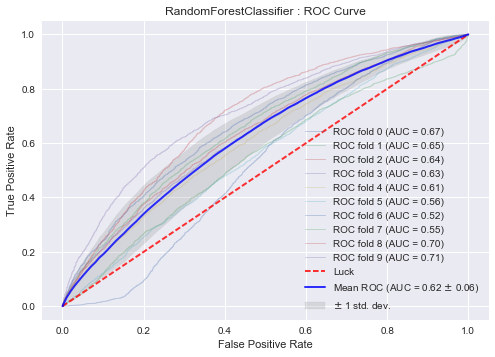

In [26]:
# Stratified k-fold cross validation

# import libraries
import time

import numpy as np
import matplotlib.pyplot as plt

from sklearn import metrics as mt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold

from scipy import interp
from itertools import cycle
from sklearn.metrics import roc_curve, auc

# Classifier library
from sklearn.ensemble import ExtraTreesClassifier          # <--- Update

# Define predictor and outcome variables
X = X0.as_matrix()
y = y0.as_matrix()

# Cross validation object
num_cv_iterations = 10
cv_object = StratifiedKFold(n_splits = num_cv_iterations, random_state = 1)


# Classifier
names = ['DecisionTreeClassifier','ExtraTreesClassifier','RandomForestClassifier']

classifiers = [DecisionTreeClassifier(max_depth = 10, random_state = 0),
               ExtraTreesClassifier(n_estimators = 100 , max_depth = 25, random_state = 0),
               RandomForestClassifier(n_estimators = 75,max_depth = 15, random_state = 0)]

result_final = np.zeros((len(names), 13)) # table collecting accuracy, confusion, and calculation time

# loop for three classifiers
j = 0;
for name, clf in zip(names, classifiers):
    t = time.time()  # time recording for each classifiers
    
    # Result table prep
    model_score_col = ['Accuracy', 'Conf_TN','Conf_FP','Conf_FN','Conf_TP']
    model_score = np.zeros((num_cv_iterations, len(model_score_col)))

    yhat_score = np.zeros((y.shape[0],1))

    # Roc prep
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)

    # CV iteration number
    i = 0

    for train_indices, test_indices in cv_object.split(X,y): 

        X_train = X[train_indices]
        y_train = y[train_indices]

        X_test = X[test_indices]
        y_test = y[test_indices]

        # Standardization
        scl_obj = StandardScaler()
        scl_obj.fit(X_train) 

        X_train_scaled = scl_obj.transform(X_train)                  
        X_test_scaled = scl_obj.transform(X_test) 

        # Train & Predict
        clf.fit(X_train_scaled, y_train)
        y_hat = clf.predict(X_test_scaled) # get test set precitions

        # Accuracy & Confusion matrix output
        acc = mt.accuracy_score(y_test,y_hat)
        conf = mt.confusion_matrix(y_test,y_hat)
        model_score[i, :] = np.append(acc, conf.ravel())             # Collect prediction outputs

        # Roc curve score
        probas_ = clf.predict_proba(X_test_scaled)                   # get test set precitions

        # Compute ROC curve and area the curve
        fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
        tprs.append(interp(mean_fpr, fpr, tpr))
        tprs[-1][0] = 0.0
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)
        plt.plot(fpr, tpr, lw=1, alpha=0.3,
                 label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

        i += 1

    # print 10-fold result average
    score_mean = pd.DataFrame(model_score.mean(axis = 0)).T
    score_mean.columns = model_score_col
    print(name, ', Score Average: \n',score_mean)

    score_std = pd.DataFrame(model_score.std(axis = 0)).T
    score_std.columns = model_score_col
    print('\nScore Standard Deviation: \n',score_std)

    elapsed = time.time() - t
    print('\nElapsed time for ',name, ' is ', round(elapsed/60, 1), ' minutes')
    
    
    # ROC Plot
    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
             label='Luck', alpha=.8)

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    plt.plot(mean_fpr, mean_tpr, color='b',
             label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
             lw=2, alpha=.8)

    std_tpr = np.std(tprs, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                     label=r'$\pm$ 1 std. dev.')

    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(name + ' : ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

    # collect final average results
    resultAvg = np.append(np.append(np.append(np.append(score_mean.as_matrix(columns=None), score_std.as_matrix(columns=None)), elapsed),mean_auc),std_auc)
    result_final[j] = resultAvg
    j += 1

# <font color = red> Modeling and Evaluation 4: Accuracy & ROC AUC

<font color = red> Three classifiers shown below are utilized to classify the 'churn' value.  The hyperparameters for each classifier as shown below are found by trying multiple combinations of parameter values.  

- <font color = red>  DecisionTreeClassifier(max_depth = 10),
- <font color = red>  ExtraTreesClassifier(n_estimators = 100 , max_depth = 25),
- <font color = red>  RandomForestClassifier(n_estimators = 75,max_depth = 15)

<font color = red> The accuracy values and the confusion matrix values are found by stratified 10-fold cross validation.  Accuracy values for decision tree, extra trees, and random forest models were 0.566,0.583, and 0.588 accordingly.  Please see below graphs for the accuracy and the detailed accuracy outputs from confusion matrix. 

<font color = red> The accuracy values from the three classifiers are in a range of 0.56 and 0.58 which is showing very poor prediction accuracy.  For the binary classification the accuracy starts from 0.5.  With classification models it only increase the accuracy by about 7%.  The bar plot showing the confusion matrix values indicates the true negative and true positive counts are higher than the false negative and false true counts.  The bar chart counts are distinguishably different even though the difference is not great.  This means that predictions are still better than guessing with classification models. Telecom companies deal with a 180-billion dollar market. If they can effectively predict and target customers who is churning even for one percent of customers, the profit gain from retaining existing one or two percent of whole customers will be huge. 

<font color = red> Receiver Operator Characteristic(ROC) curve is another matrix that we used to evaluate the model. Its functionality is to visually express the true positive and false positive rate against each possible threshold from our prediction model. 10 ROC curve values are collected from each cross validation and averaged as shown above for each classifier. The red dotted line is representing 50% accuracy, and our solid blue line represent the average of 10-ROC curves. The area under the curve(AUC) of ROC curve represent the performance of the model, and the area close to 1 will have higher accuracy.  Our three models show the AUC values around 0.58~0.62, which also shows direct relation with prediction accuracy values from each model.  Below t-test shows that there is no significant difference among the AUC values from three models.  The accuracy level is pretty low. We have been discovered previously through a mini-lab that the logistic regression and the support vector machine also produced poor prediction accuracies. By this classification analysis we are concluding that the churn value is cannot be predicted well with the current dataset.  However, what classification models are telling is that still utilizing model is better than guessing.

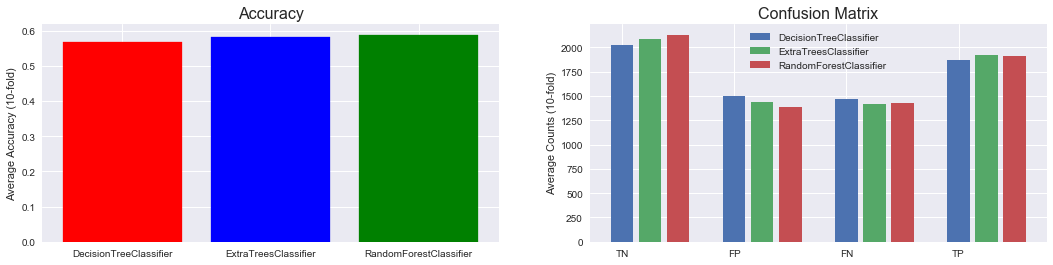

In [27]:
# Classifier Accuracy Outputs

Accuracy = result_final[:,0]
Confusion = result_final[:,1:5]

# Accuracy plot
plt.figure(figsize = (18,4))
plt.subplot(1,2,1)
x = [1,2,3]
barlist = plt.bar(x, Accuracy)
barlist[0].set_color('r')
barlist[1].set_color('b')
barlist[2].set_color('g')
plt.xticks(x, names)
plt.ylabel('Average Accuracy (10-fold)')
plt.title('Accuracy', fontsize=16)

# Confusion matrix plot

x = np.array([1,5,9,13])
xLabel = ['TN','FP','FN','TP']
width = 1

plt.subplot(1,2,2)
for ind, i in enumerate(names):
    x2 = x+width*ind
    plt.bar(x2, Confusion[ind], align = 'center')
plt.xticks(x, xLabel)
plt.legend(names)
plt.ylabel('Average Counts (10-fold)')
plt.title('Confusion Matrix', fontsize=16)
plt.show()

In [28]:
# t-test for each pair of three ROC AUC values
from scipy.stats import ttest_ind_from_stats

for i in range(0,3):
    j = i+1
    if j ==3:
        j = 0

    # Compute the descriptive statistics of a and b.
    abar = result_final[i,11]
    avar = result_final[i,12]
    na = 10
    adof = na - 1

    bbar = result_final[j,11]
    bvar = result_final[j,12]
    nb = 10
    bdof = nb - 1

    # Use scipy.stats.ttest_ind_from_stats.
    t2, p2 = ttest_ind_from_stats(abar, np.sqrt(avar), na,
                                  bbar, np.sqrt(bvar), nb,
                                  equal_var=False)
    print('\nROC AUC Comparison Test for', names[i], 'and', names[j])
    print("ttest_ind_from_stats: t = %g  p = %g" % (t2, p2))


ROC AUC Comparison Test for DecisionTreeClassifier and ExtraTreesClassifier
ttest_ind_from_stats: t = -0.351972  p = 0.728957

ROC AUC Comparison Test for ExtraTreesClassifier and RandomForestClassifier
ttest_ind_from_stats: t = -0.0237816  p = 0.98129

ROC AUC Comparison Test for RandomForestClassifier and DecisionTreeClassifier
ttest_ind_from_stats: t = 0.36184  p = 0.721688


# <font color = red> Modeling and Evaluation 5: Model Comparison

<font color = red> There were noticeable differences in train and test time among classifieres.  As the bar graph shown below, the modeling time (train and test time for 10-fold cross validation with our dataset(68634, 17)) was drastically differernt.  ExtraTrees classifier was about 10 times slower than the DecisionTree, and RandomForest was more than 16 times slower than the DecisionTree classifier.   After the below graph, individual paired t-test was performed to see the significance in the difference of average accuracy. The t-test result shows that there is no significant difference in average accuracy from any combination of the classifiers because the p-value were all much greater than 0.05.  In other words, the difference in average accuracies are not different with 95% confidence.

<font color = red> RandonForest runs based on bagging or bootstrap aggregation of DecisionTree models, which means RandomForest generates multiple DecisionTree models using bootstrap samples from original dataset.  The reason of doing bagging is it reduces the model variances (overfitting).  Thus, the 10-time difference in modeling time in RandomForest comparing to DecisionTree is understandable.   There is a slight difference in the ExtraTrees from RandomForest.  For example, ExtraTrees choose samples from the entire training set instead of a bootstrap sample, and split mechanism difference allow to have more leaves.  ExtraTrees are know to be cheaper to train than RandomForest, and our train+test time output support that theory.  

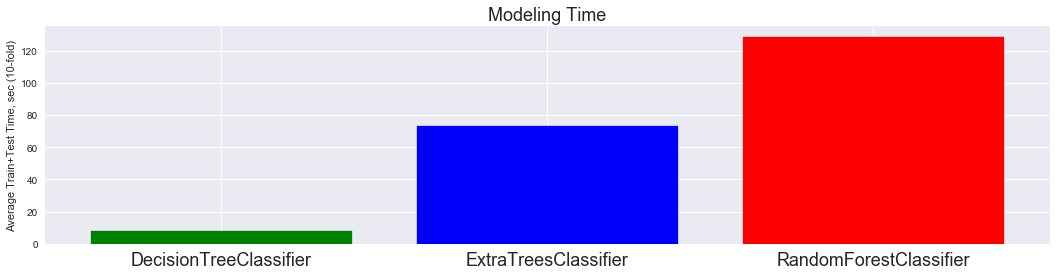

Modeling Time relative to Decision Tree =  [  1.           9.28779105  16.36497058]


In [29]:
# Classifier Performance Outputs

# Elapsed Time plot
elapseTime = result_final[:,10]
plt.figure(figsize = (18,4))
x = [1,2,3]
barlist = plt.bar(x, elapseTime)
barlist[0].set_color('g')
barlist[1].set_color('b')
barlist[2].set_color('r')
plt.xticks(x, names, fontsize=18)
plt.ylabel('Average Train+Test Time, sec (10-fold)')
plt.title('Modeling Time', fontsize=18)
plt.show()

print('Modeling Time relative to Decision Tree = ',  elapseTime/elapseTime[0])

In [30]:
# t-test for each pair of three accuracy values
from scipy.stats import ttest_ind_from_stats

for i in range(0,3):
    j = i+1
    if j ==3:
        j = 0

    # Compute the descriptive statistics of a and b.
    abar = result_final[i,0]
    avar = result_final[i,5]
    na = 10
    adof = na - 1

    bbar = result_final[j,0]
    bvar = result_final[j,5]
    nb = 10
    bdof = nb - 1

    # Use scipy.stats.ttest_ind_from_stats.
    t2, p2 = ttest_ind_from_stats(abar, np.sqrt(avar), na,
                                  bbar, np.sqrt(bvar), nb,
                                  equal_var=False)
    print('\nMean Comparison Test for', names[i], 'and', names[j])
    print("ttest_ind_from_stats: t = %g  p = %g" % (t2, p2))


Mean Comparison Test for DecisionTreeClassifier and ExtraTreesClassifier
ttest_ind_from_stats: t = -0.206287  p = 0.838892

Mean Comparison Test for ExtraTreesClassifier and RandomForestClassifier
ttest_ind_from_stats: t = -0.0645293  p = 0.949264

Mean Comparison Test for RandomForestClassifier and DecisionTreeClassifier
ttest_ind_from_stats: t = 0.26176  p = 0.796479


# <font color = red> Modeling and Evaluation 6: Most Important Feature


<font color = red> The most important features are selected using the RandomForest classifier, which showed the highest accuracy among three.  Recursive feature elimination(RFE) method is utilized to rank features.  RFE recursively finds the feature importance using RandomForest classifier by eliminating the least important feature at a time.

<font color = red> The most important feature using the RandomForest classifier to the predict churn was 'totrev' feature which tells about how much amount of money a customer paid from the begining of service contract.  RandomForest mechanism is completely different than a linear regression; however, it is still interesting that the correlation coefficient (see below) shows a very small value, 0.002 but giving high importance.  The cost function, Gini, in the RandomForest found that the 'totrev' is the most significant attribute that split the churn value. We can speculate that the customer tent to churn as the total revenue reaches higher which it has to be since customer only can pay more as long as they keep a service. The second most important feature ('eqpdays') is also works similar as the first important feature('totrev').  As time goes, the total pay to the provide increases as well as the days/age of equipment increases. Some features are ranked lower than the 'totrev'.  For example, the length of residence('lor') or handset price('hnd_price') may not be more important than the 'totrev' since it is not indicating the time lapse from the starting day of service.  

| RandomForest Rank | Attribute       |  Definition                                                                                                                                                                                                                                                                 |
|------------|-----------------|:---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| 1         | totrev          | Total Revenue(charge amount) from the day of first service.                                                             |
| 2          | eqpdays          | the older the handset, the more likely a person is coming up on the end of a contract period and looking for the next good deal to get a new handset which may not be with their current subscriber                                                                        |
| 3          | change_mou        | (Percentage change in monthly minutes of use vs previous three month average) - This will determine increasing or decreasing usage that will be important as a demonstration of satisfaction. Users that are beginning to lower their usage may be getting ready to churn or they alrady churned. |

In [31]:
# RFE Feature Importance and Corr.Coef w/Churn

from sklearn.feature_selection import RFE

# Classifier with best accuracy
estimator = RandomForestClassifier(n_estimators = 75,max_depth = 15, random_state = 0)

# dataset: total attributes with drop NaN
X = preprocessing.scale(X0.as_matrix())  # standardization
y = y0.as_matrix()

# feature selection

featureTotal = 1

# estimator = ... #defined above
selector = RFE(estimator, featureTotal, step = 1)  
selector = selector.fit(X, y) 

# # Feature Rank
rankTable = pd.DataFrame([X0.columns.values,selector.ranking_]).T
rankTable.columns = ['Attributes','Rank']
rankTable_sort = rankTable.sort_values(by = 'Rank', axis = 0, ascending = True)
print(rankTable_sort)

# Corr.Coef: Churn vs. [totrev, eqpdays, change_mou]
print('\nCorr.Coef: Churn vs. [totrev, eqpdays, change_mou]')
print(np.corrcoef([y0, X0.totrev, X0.eqpdays, X0.change_mou]))

         Attributes Rank
10           totrev    1
16          eqpdays    2
2        change_mou    3
11           avgrev    4
4     mou_cvce_Mean    5
9          totcalls    6
3        change_rev    7
8            months    8
12           avgqty    9
0       totmrc_Mean   10
5     mou_rvce_Mean   11
13          avg3rev   12
7     drop_blk_Mean   13
1       ovrmou_Mean   14
14        hnd_price   15
15              lor   16
6   iwylis_vce_Mean   17

Corr.Coef: Churn vs. [totrev, eqpdays, change_mou]
[[ 1.          0.00288752  0.11673947 -0.03524846]
 [ 0.00288752  1.          0.05470044 -0.0825785 ]
 [ 0.11673947  0.05470044  1.         -0.00510146]
 [-0.03524846 -0.0825785  -0.00510146  1.        ]]


# <font color = red> Deployment of Classification Models

Ultimately the decision as to which model to use and how to deploy it comes down to the **money** to be lost or gained through its deployment.  This can be broken out into 3 facets that we must evaluate; the first is looking at precision measures as opposed to simple model accuracy,  the second is to devise a strategy to mitigate the lack of model accuracy.  And finally the third is to devise a strategy to optimize the budget provided for anti-churn (or save) programs.

Let’s look at financial determinants beyond model accuracy.  Originally we began to leverage a LinearSVM model we obtained our highest accuracy at 0.5529 with a C = 1.0.  Ultimately we had to eliminate the use of LinearSVC because while the simple accuracy measure wasn’t bad in comparison, the false negative and false positive rates were very probablematic.  Let’s start with the false positives; these are customers that we predicted would churn, however they stayed. If we offer a false positive a coupon proactively to stay, we have unnecessarily lowered our monthly revenue for that customer; not a good outcome but perhaps a better outcome that an increase in false negative.  The for a C=1 versus a C=7, the change in percentage of false positives is a drop of 0.24%.  This isn’t a very large change in the face of our accuracy scores.

The highest magnitude value in our confusion matrix to watch was for the false negatives (FN), these are customers that we predicted would stay however they churned. These customers (FN) represent a complete loss of monthly revenue.  At C=1, the percentage of false negatives was 31.89%, however for a C=7 the percentage of false negatives is 32.32%; an increase of 0.43 %.  This increase in error is clearly not what we want, our goal is to optimize for the smallest possible false negatives in order remove these total losses.  Such a small change may sound irrelevant but let’s put some real numbers behind them.  If monthly revenue averages 40 per month and a telecom has 100 M customers that is 4 billion dollars in monthly revenue so small percentage changes can have a very large effect.  The FN rate was minimized with a value C=30, but only trivially and also with a drop in accuracy, so in reality these minor changes in accuracy on FN rates are fairly trivial in our example.  But the FN rate should always be considered for this type of use case.

Another deployment consideration is that the classification algorithm, LinearSVC, did not support a likelihood score along with the binary classification.  It may be beneficial to establish likelihood cutoff rates.  The true positive rate of our LinearSVC model hovered around 17 %.  Since we don’t know what month that the churn activity will take place we can’t assume the entire 17% each month. But if we assume that it is within the next 4 months, then a rate of 4% per month is what we are working with, but this is still 4 M customers per month.  This is a staggering number to reach out to with costly proactive intervention.   There are a few other scikit learn classification algorithms that also provide probabilities based on logistic regression based on the idea of Platt Scaling.  These are SVC, NuSVC, SVR and NuSVR.  We actually leveraged SVC (with the RBF kernel) in initial model evaluation but chose to explore LinearSVC due to familiarity; in reflection leveraging SVC with the probability parameter might be very well worth exploring given the about equal accuracy of the two algorithms.  And the likelihood score in addition to the churn classification for each customer could be used to segment the top candidates for churn and use our marketing and call center resources more effectively.  The inclusion of the likelihood score with such low accuracy models ultimately led the selection of using ExtraTrees in lieu of LinearSVC.

Our final facet to consider in deployment puts our budget considers under the spotlight.  As a part of our data set, there are a few customer revenue related features; among them is a rev_mean or the average monthly revenue of the customer.  **This is the  value worth of that customer to the telecom company.**  So of the 17 percent of potential churners that we’ve identified we need to devise a strategy to maximize our marketing and call center $ toward those in the highest revenue deciles and establish a cutoff point.  Incidentally, rev_mean was actually the top most important feature in the LinearSVC model and Random Forest.  And change_rev (change in monthly revenue) was in the top 5 features for Gradient Boosting.

The Gradient Boosting algorithm proved to have higher accuracy than the LinearSVC models; and won over ExtraTrees and Random Forest.  Gradient Boosting achieved accuracy levels of nearly 63 percent about 4 percent better than LinearSVC, but we must also look at the false negative rate and ensure that we aren’t inflating this key metric.  And, in fact, the Gradient Boosting model’s false negative performance is much lower.  Instead of the 32 percent FN rate achieved by the LinearSVC model, Gradient Boosting substantially lowered the FN rate to only around 19 percent.  This 13 percent drop in an **expensive error rate** is quite nice and makes it a clear winner over LinearSVC.  However Random Forest achieved an even lower FN rate of ~17 percent with the tradeoff being a slight drop in accuracy to only 60 percent; though it’s FP rate was larger than Gradient Boosting.  So, on balance the Gradient Boosting model gives the best accuracy rate and a good false negative error rate.  Leveraging Gradient Boosting in combination with the targeting of only the top revenue deciles would provide us with the best business outcome







# <span style="color:red"> Analysis 2: Regression </span>

## <span style="color:red">Objective: 

<span style="color:red">Revenue or cash is what driving a business.  The feature, 'change_rev', shows changes of revenue in dollar in monthly revenue compared with last three month average.  It will be beneficial if we know which features contributing to the revenue change.  Once an accurate model is developed, telecom companies can predict revenue changes. So that they can proactive about the revenue changes.

# <span style="color:red"> Data Preparation Part 1 </span>

### <font color=red>The Telecom Dataset</font>

<font color=red> Please see the data preparation part from the above classification analysis for the background information about the telecom dataset.

<font color=red> The unfiltered dataset, 'df_dummy', from the previous analysis right after generating dummy variables will be used as a starting dataset.

In [32]:
#2. Transform into dummy variable

df_dummy = pd.get_dummies(df2)
df_dummy.shape

(100000, 207)

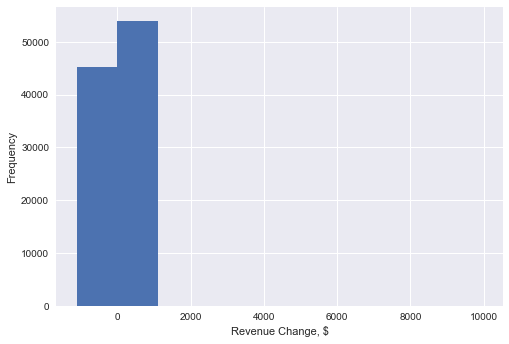

Count of values that is greater than about 20 times of standard deviation =  4


In [33]:
# hist 'change_rev'
df_dummy.change_rev.hist()
plt.xlabel('Revenue Change, $')
plt.ylabel('Frequency')
plt.show()

print('Count of values that is greater than about 20 times of standard deviation = ', sum(df_dummy.change_rev > 1000))

### Data Cleaning for 'change_rev'

- 4 extreme outliers are removed that is greater than 20 times of standard deviation
- Samples showing no changes in revenue are disregarded since we are looking for the contributers of change in revenue.

dataset shape after cleaning =  (36345, 207)


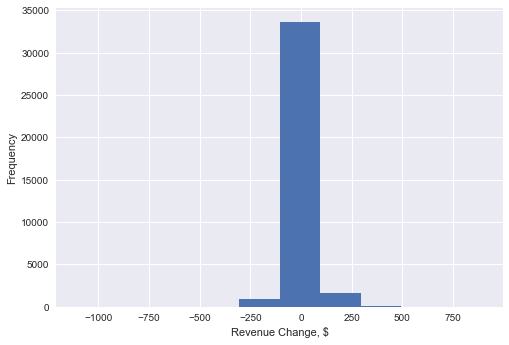

In [34]:
# Delete rows with extreme outliers in change_rev
# NaN values are also deleted with this process
df_dummy_regr = df_dummy.loc[df_dummy.change_rev < 1000, :]

# Remove near zero in revenue changes, (-$10 < change < $10)
df_dummy_regr2 = df_dummy_regr.loc[(df_dummy_regr.change_rev < -10) | (df_dummy_regr.change_rev > 10) , :]
print('dataset shape after cleaning = ', df_dummy_regr2.shape)

# hist 'change_rev'
df_dummy_regr2.change_rev.hist()
plt.xlabel('Revenue Change, $')
plt.ylabel('Frequency')
plt.show()

### Correlation with revenue related features

Correlations are checked for the features with similar names in order to check the redundancy in features.  Surprisingly, the change_rev feature is not significantly correlated with other related name features.  'totrev' showing correlation coefficient of 0.9988 with 'adjrev' so 'totrev' will be removed since they are almost identical.  

In [35]:
df_related = df_dummy_regr2[['change_rev','rev_Mean','avgrev','totrev','adjrev','avg3rev','avg6rev','ovrrev_Mean']]
df_related.corr()

change_rev  rev_Mean    avgrev    totrev    adjrev   avg3rev  \
change_rev     1.000000 -0.040121 -0.201588 -0.134193 -0.134210 -0.367895   
rev_Mean      -0.040121  1.000000  0.736571  0.517919  0.515199  0.938698   
avgrev        -0.201588  0.736571  1.000000  0.653753  0.646758  0.757559   
totrev        -0.134193  0.517919  0.653753  1.000000  0.998864  0.529021   
adjrev        -0.134210  0.515199  0.646758  0.998864  1.000000  0.526403   
avg3rev       -0.367895  0.938698  0.757559  0.529021  0.526403  1.000000   
avg6rev       -0.289521  0.860753  0.880081  0.634511  0.631493  0.901576   
ovrrev_Mean    0.012513  0.820471  0.493098  0.298726  0.299183  0.754054   

              avg6rev  ovrrev_Mean  
change_rev  -0.289521     0.012513  
rev_Mean     0.860753     0.820471  
avgrev       0.880081     0.493098  
totrev       0.634511     0.298726  
adjrev       0.631493     0.299183  
avg3rev      0.901576     0.754054  
avg6rev      1.000000     0.631348  
ovrrev_Mean  0.631348     1.000000

### Dataset for Feature Selection

There are only 13k samples because it removed all rows with NaN values.  Once lower number of features are selected, the sample number will go up to 36k maximum. 

In [36]:
# dataset for Regression Feature Selection

# drop 'totrev'
df_dummy_regr3 = df_dummy_regr2.drop('totrev',1)   # Start from this df once lower number of features are selected
df_dummy_regr3.shape

# drop NaN
df_dummy_regr4 = df_dummy_regr3.dropna(axis = 0)

df_dummy_NaN_y = df_dummy_regr4.change_rev
if 'change_rev' in list(df_dummy_regr4):
    df_dummy_NaN_X = df_dummy_regr4.drop('change_rev', axis = 1)
else:
    df_dummy_NaN_X = df_dummy_regr4
    
print('dataset without ''change_rev''  =', df_dummy_NaN_X.shape)

dataset without change_rev  = (13041, 205)


## <span style="color:red"> Feature selection using Feature Importance  </span>

<span style="color:red"> Feature_importance output from the regressors will be utilized to pick top 20 attributes.  We picked 20 features since we found from a separate study that the accuracy with more features are not increasing with our dataset.  Recursive feature elimination(RFE) method, which is also utilizing feature_importanct, is not used to pick the top features since it take long time to rank feature by recursively run regressors by removing one feature at a time.  Instead, feature importance outputs of three regressors that we are going to use will be averaged to find a final rank using three regressors.  

In [37]:
# Feature Importance from multiple classification algorithms
import time
t = time.time()  # Check Calculation Time

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, AdaBoostRegressor


names = ["Random Forest", "AdaBoost", "GradientBoosting"]

regressors = [RandomForestRegressor(random_state = 0),
              AdaBoostRegressor(random_state =0),
              GradientBoostingRegressor(random_state =0)]

X = preprocessing.scale(df_dummy_NaN_X.as_matrix()) 
y = df_dummy_NaN_y.as_matrix()
col_x_list = list(df_dummy_NaN_X)

k = 0

model_score = np.zeros((X.shape[1],len(regressors)))

for name, clf in zip(names, regressors):
    
    # training
    clf.fit(X, y)

    # feature importance score
    score = pd.DataFrame({'Attribute': col_x_list, 'Importance': clf.feature_importances_})
    # Add Rank
    score[name] = score['Importance'].rank(ascending = 0) # the higher, the more important the feature
    
    # Importance Rank Collection
    model_score[:, k] = score.ix[:,2] # Collect prediction outputs
#     print (name, acc.mean())
    k += 1
    

feature_importance = pd.DataFrame(model_score)
feature_importance.columns = names
feature_importance['Features'] = col_x_list
feature_importance['Rank Average'] = feature_importance.mean(axis = 1)

# Final Rank
feature_importance['Total Rank'] = feature_importance['Rank Average'].rank(ascending = 1)
feature_importance_sort = feature_importance.sort_values(by = 'Total Rank', axis = 0, ascending = True)
feature_importance_sort = feature_importance_sort.reset_index(drop = True)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(feature_importance_sort.ix[:,0:3])

elapsed = time.time() - t
print('Elapsed time is ', round(elapsed/60, 1), ' minutes')

     Random Forest  AdaBoost  GradientBoosting
0              1.0       1.0               3.0
1              2.0       2.0               1.0
2              3.0       3.0               2.0
3              4.0       8.0               5.0
4              6.0       7.0               4.0
5              5.0       9.0               6.0
6              9.0       4.0               8.0
7              8.0      13.0              10.0
8              7.0      17.0               7.0
9             11.0      10.0              18.0
10            15.0      26.0              12.0
11            14.0      21.0              22.0
12            26.0      16.0              16.0
13            39.0       5.0              21.0
14            19.0      34.0              14.0
15            24.0      20.0              25.0
16            21.0      11.0              37.0
17            12.0      28.0              31.0
18            22.0      14.0              36.0
19            30.0      22.0              32.0
20           

In [38]:
# Final Rank
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(feature_importance_sort.ix[:,3:6])

                               Features  Rank Average  Total Rank
0                            change_mou      1.666667         1.5
1                               avg3rev      1.666667         1.5
2                              rev_Mean      2.666667         3.0
3                           ovrrev_Mean      5.666667         4.5
4                           vceovr_Mean      5.666667         4.5
5                           totmrc_Mean      6.666667         6.0
6                               avg6rev      7.000000         7.0
7                           ovrmou_Mean     10.333333         8.5
8                             roam_Mean     10.333333         8.5
9                                avgrev     13.000000        10.0
10                          Customer_ID     17.666667        11.0
11                        ccrndmou_Mean     19.000000        12.0
12                        mou_peav_Mean     19.333333        13.0
13                               phones     21.666667        14.0
14        

## <span style="color:red"> Select top 20 important features first </span>

In [39]:
# Select top 20 features

col_list = list(feature_importance_sort.ix[0:19,3])
col_list.append('change_rev')

df_temp_NaN = df_dummy_regr3.loc[:, df_dummy_regr3.columns.isin(col_list)].dropna()

y0 = df_temp_NaN.change_rev

if 'change_rev' in list(df_temp_NaN):
    X0 = df_temp_NaN.drop('change_rev', axis = 1)
else:
    X0 = df_temp_NaN

print('dataset without change_rev  =', X0.shape)

dataset without change_rev  = (35119, 20)


## <span style="color:red"> Multicollinearity Check  </span>

<span style="color:red"> Collinearity may affect the regression task. ** However, if the coefficient of correlation is greater than 0.85, it is definitely a redundant feature in a model.**  Thus, the features with the coefficient of correlation greater than 0.85 will be removed with the average feature importance rank found above. Below scatter matrix allows to check correlations visually. The scatter plots looking like a straight line show the redundancy in features. </span>

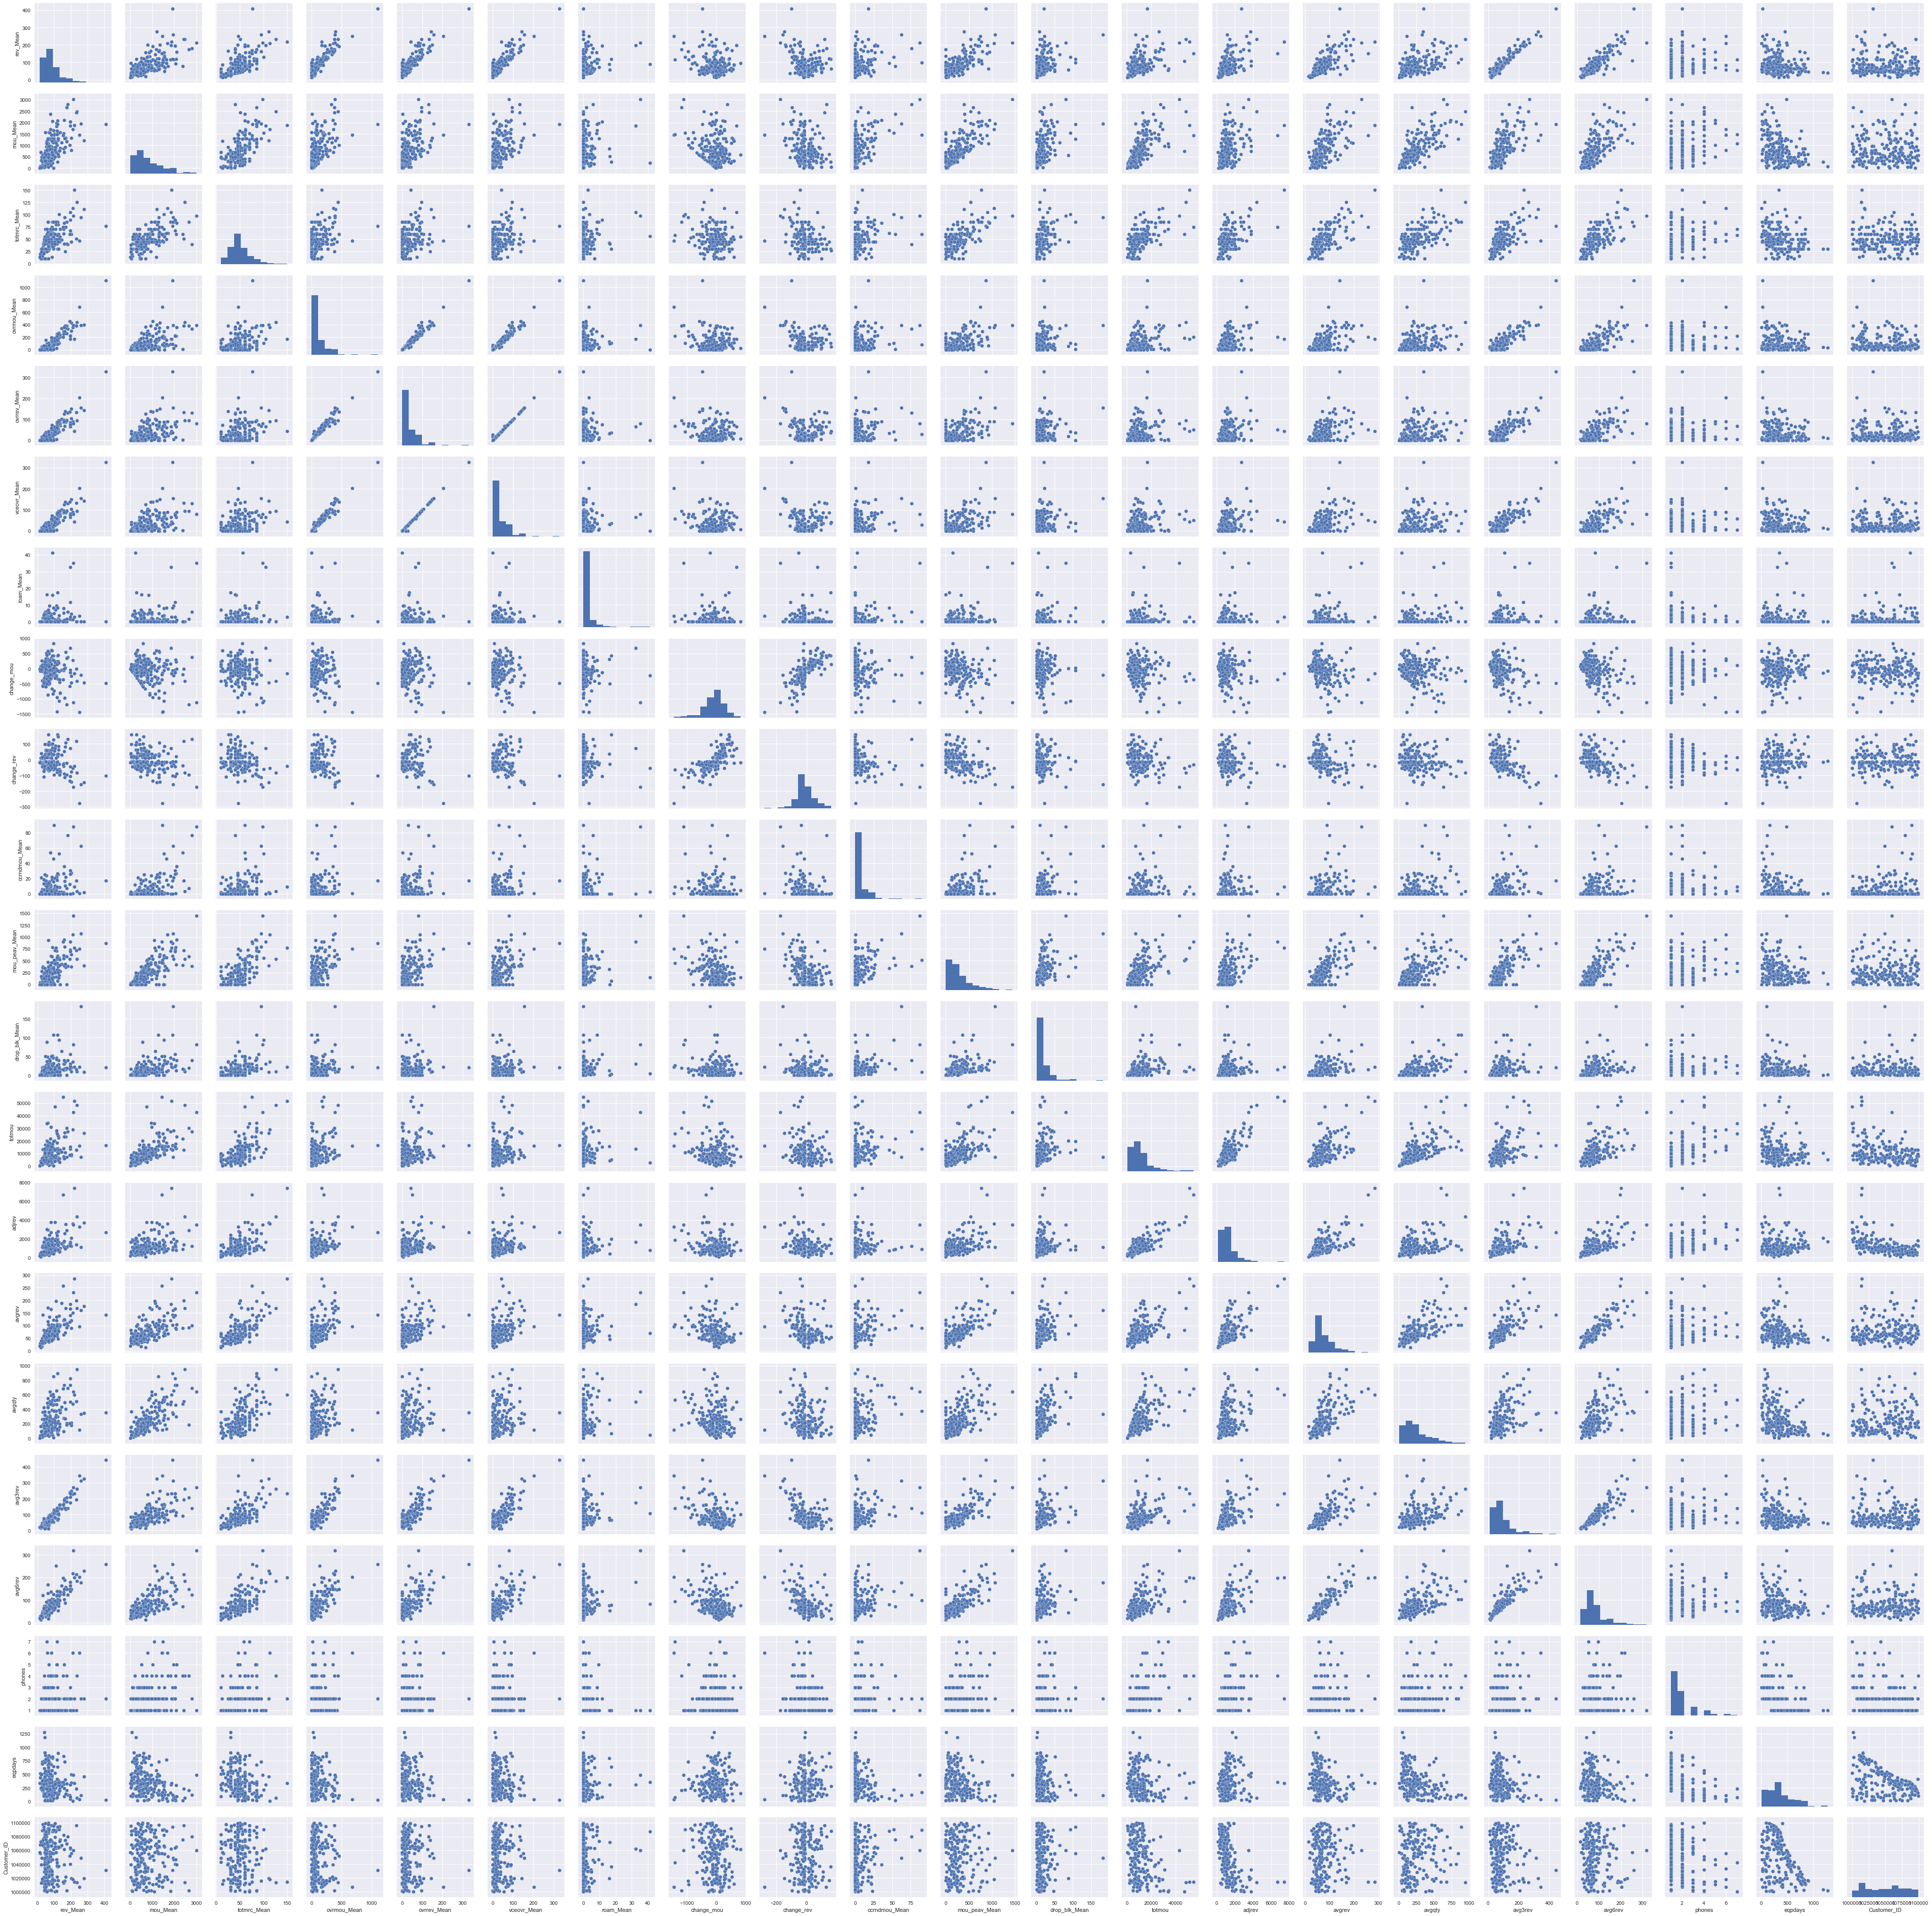

In [40]:
# Scatter Matrix
import seaborn as sns  

# sample values only for scatter plot
sample_scatter = df_temp_NaN.sample(n = 200, random_state = 0, axis = 0)

sns.pairplot(sample_scatter, palette = 'hls')
plt.show()

## Features with high correlation coefficient
The list is twice long since the result is not filtered with orders.

In [41]:
# Identifying highly correlated attributes

corr = X0.corr()
HighCorr = corr > .85  # Enter desired corr.coef value as a limit

result = pd.melt(HighCorr.reset_index(), id_vars=['index'])
mask = result['value'] == True
result = result.loc[mask, ['index', 'variable']]
result.columns = [0, 1]
# print(result)

HighCorr_var = result.ix[result.ix[:,0] != result.ix[:,1] ,:]
print(HighCorr_var)
HighCorr_varList = HighCorr_var.ix[:,0]
HighCorr_varList = HighCorr_varList.drop_duplicates()
# print(HighCorr_varList)

               0            1
15       avg3rev     rev_Mean
16       avg6rev     rev_Mean
64   ovrrev_Mean  ovrmou_Mean
65   vceovr_Mean  ovrmou_Mean
83   ovrmou_Mean  ovrrev_Mean
85   vceovr_Mean  ovrrev_Mean
103  ovrmou_Mean  vceovr_Mean
104  ovrrev_Mean  vceovr_Mean
276      avg6rev       avgrev
300     rev_Mean      avg3rev
316      avg6rev      avg3rev
320     rev_Mean      avg6rev
333       avgrev      avg6rev
335      avg3rev      avg6rev


## <span style="color:red">  Drop features with high correlation and lower rank

<span style="color:red"> The features are selected manually to drop by comparing the correlation coefficient and the average importance ranking.  

<span style="color:red"> Following features have a high correlation coefficient and lower importance so those will be removed: ['rev_Mean','ovrmou_Mean','vceovr_Mean','avgrev','avg6rev'] 

In [42]:
# Drop Features with High Correlation
DropList = ['rev_Mean','ovrmou_Mean','vceovr_Mean','avgrev','avg6rev'] # <--- Update attribute names to drop based on the corr.coef and rank values
col_list2 = col_list

for i in DropList:
    col_list2.remove(i)

# Subset from original dataFrame for the selected features

df_dummy_FE_NaN = df_dummy_regr3.loc[:, df_dummy_regr3.columns.isin(col_list2)].dropna()

y0 = df_dummy_FE_NaN.change_rev

if 'change_rev' in list(df_dummy_FE_NaN):
    X0 = df_dummy_FE_NaN.drop('change_rev', axis = 1)
else:
    X0 = df_dummy_FE_NaN

print('dataset without change_rev  =', X0.shape)

dataset without change_rev  = (36345, 15)


# <span style="color:red"> Data Preperation Part 2 </span>

##  <span style="color:red"> Final dataset for Regression analysis include 15 features and 36,345 observations.

<span style="color:red">  Below features are going to be used for the furthur regression analysis to predict the 'change_rev' values.  'Customer_ID' value is also included here, which is curious to see what relation exist with the 'change_rev'. Simple statistics of each feature is also shown on the below table. 

| Final Rank | Attribute       | Average Rank Score | Definition                                                                                                                                                                                                                                                                 |
|------------|-----------------|--------------------|:---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| 1.5        | change_mou      | 1.66               | Percentage change in monthly minutes of use vs previous three month average       |
| 1.5        | avg3rev         | 1.66               | Average monthly revenue over the previous three months                                                                                                                                                                                                                     |
| 4.5        | ovrrev_Mean     | 5.66               | Mean overage revenue                                                                                                                                                                                                                   |
| 6.0          | totmrc_Mean     | 6.66              | Average reoccuring monthly bill                                                                                                                                                                                                                                            |
| 8.5          | roam_Mean     | 10.33             | Mean number of roaming calls                                                                                                                                                                                                                                        |
| 11.0         | Customer_ID    | 17.66             | Average monthly revenue over the life of the customer                                                                                                                                                                                                                                        |
| 12.0         | ccrndmou_Mean    | 17.66             | Mean rounded minutes of use of customer care calls                                                                                                                                                                                                                                |
| 13.0        | mou_peav_Mean    | 19.33             | Mean unrounded minutes of use of peak voice calls                                                                                                                                                                                                                               |
| 14.0        | phones    | 21.66             | Number of handsets issued                                                                                                                                                                                                             |
| 15.0          | mou_Mean        | 22.33              | Mean number of monthly minutes of use                                                                                                                                                                                                                                      |
| 16.5          | drop_blk_Mean        | 23.0             | Mean number of dropped or blocked calls                                                                                                                                                                                                                             |
| 16.5          | eqpdays         | 23.0                | Number of days (age) of current equipment                                                                        |
| 18.5          | adjrev         | 23.66                | Billing adjusted total revenue over the life of the customer                                                                |
| 19.0          | avgqty          | 24.0                | Average monthly number of calls over the life of the customer                                                                                                                                                                                                              |
| 20.0          | totmou          | 28.0                | Total minutes of use over the life of the customer                                                                                                                                                                                                      |



In [43]:
# Description of final features
X0.describe()

mou_Mean   totmrc_Mean   ovrrev_Mean     roam_Mean    change_mou  \
count  36345.000000  36345.000000  36345.000000  36345.000000  36345.000000   
mean     773.059904     50.535925     31.272918      2.471768    -24.497144   
std      617.424436     25.470849     42.636122     14.133214    381.885323   
min        0.000000    -26.915000      0.000000      0.000000  -3875.000000   
25%      346.500000     33.742500      6.825000      0.000000   -187.250000   
50%      611.750000     44.992500     18.735000      0.000000    -21.750000   
75%     1029.250000     59.990000     39.675000      0.682500    151.500000   
max     7667.750000    409.990000   1102.400000   1112.447500   4480.000000   

       ccrndmou_Mean  mou_peav_Mean  drop_blk_Mean         totmou  \
count   36345.000000   36345.000000   36345.000000   36345.000000   
mean        7.574513     268.895107      14.903458   10342.901138   
std        16.192836     259.314125      19.336626   10387.140443   
min         0.000000       0.000000       0.000000       4.000000   
25%         0.000000     104.043333       4.000000    4258.000000   
50%         1.333333     203.853333       9.333333    7543.000000   
75%         8.666667     351.853333      18.666667   12980.000000   
max       561.000000    4015.346667     489.666667  233419.096700   

             adjrev        avgqty       avg3rev        phones       eqpdays  \
count  36345.000000  36345.000000  36345.000000  36345.000000  36345.000000   
mean    1178.371413    241.565858     84.769514      2.012024    329.442289   
std     1014.125450    198.052236     61.811110      1.513529    230.930529   
min       21.780000      0.000000      1.000000      1.000000     -5.000000   
25%      562.940000    112.910000     49.000000      1.000000    165.000000   
50%      902.870000    191.000000     70.000000      2.000000    296.000000   
75%     1450.140000    309.630000    102.000000      2.000000    441.000000   
max    27071.300000   3017.110000   1593.000000     24.000000   1782.000000   

        Customer_ID  
count  3.634500e+04  
mean   1.051988e+06  
std    2.868778e+04  
min    1.000001e+06  
25%    1.027509e+06  
50%    1.052715e+06  
75%    1.076927e+06  
max    1.099994e+06

In [44]:
# Checking corr.coef between 'change_rev' and 'Customer_ID'
# --->  Showing very weak correlation

print(np.corrcoef([X0.Customer_ID, y0]))

[[ 1.          0.00789856]
 [ 0.00789856  1.        ]]


#  <span style="color:red"> Modeling and Evaluation 1

### <span style="color:red"> Modeling Evaluation Metric
<span style="color:red"> For regression models, ** R-Squred values ** will be used to compare the fitness of the model.  Scikit-learn regressors are generally gives out r-square value as a score output. Also, r-squared value is normally ranged between 0 and 1 so everyone know the meaning of the r-squared value without great deal of explanation. On the other hand, mean squared error need some background information or references about the data in order to understand the meaning of the mean square error. Thus, we chose r-squared value as an evaluation metrix of regression models

#  <span style="color:red"> Modeling and Evaluation 2

### <span style="color:red"> Dividing our data
<span style="color:red"> We Used ** 10-fold Cross-Validation** to divide our data into training and testing splits. K-fold cross-validation randomly partition the original sample into equal sized subsamples. We are going to shuffle the row numbers/samples before the sample get split since some feature (e.g. Customer_ID) show some relation with row numbers. So our 9 subsample will be used to train models and one sample will be used to test the model.  Then the cross-validation will repeat the train and test process for 10 times using all observations once per each fold.  For the regression task the statified k-fold crossvalidation is not used since the response variable is not categorical.  10-fold cross-validation is a common method to have some confidence in the output of a model so we used it. 

#  <span style="color:red"> Modeling and Evaluation 3

### <span style="color:red"> Regression Modeling Procedure

<span style="color:red"> - Regressor hyperparameters will be optimized to have the highest r-squared value.

<span style="color:red"> - Final r-squared values will be calculated with a stratified 10-fold cross-validation.

## <span style="color:red"> Regressor Optimization

<span style="color:red"> The hyperparameters of the three classfiers, **[GradientBoosting, RandomForest, AdaBoost(w/ DecisionTree)]**, will be optimized to get the highest R-squared value.  **Number of trees(n_estimators) and the depth of three(max_depth)** will be only changed in order to optimize the regressor performance.  The rest of the parameters of the regressors will be left as default.  

<span style="color:red"> The r-squared of regressors will be calculated using **'GridSearchCV'** function with all combination of the number of trees and the depth of tree arrays.  The following arrays will be used for the number of trees and the depth of trees accordingly: '**n_estimators':[10, 25, 50, 75, 100, 125], 'max_depth':[5, 10, 15, 20, 25]**.

<span style="color:red"> The 'GridSearchCV' uses 3-fold cross validation as default.  10-fold cross validation for this parameter optimization process seemed unnecessary because there are too many combinations of parameters to run.  However, 10-fold cross validation will be used to calculate the final accuracy once the optimum parameters are found. 

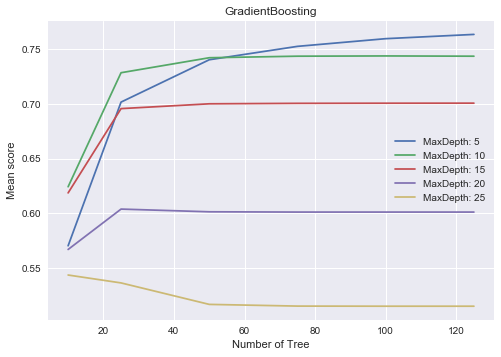

Parameters of  GradientBoosting  giving the best R-Squared :  {'max_depth': 5, 'n_estimators': 125}


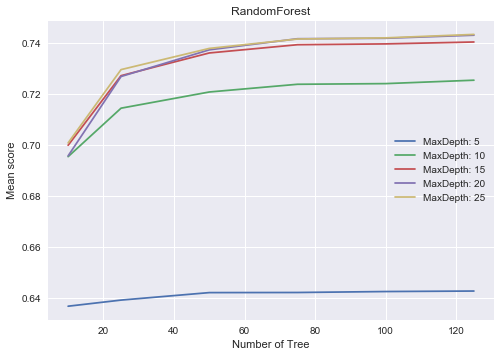

Parameters of  RandomForest  giving the best R-Squared :  {'max_depth': 25, 'n_estimators': 125}


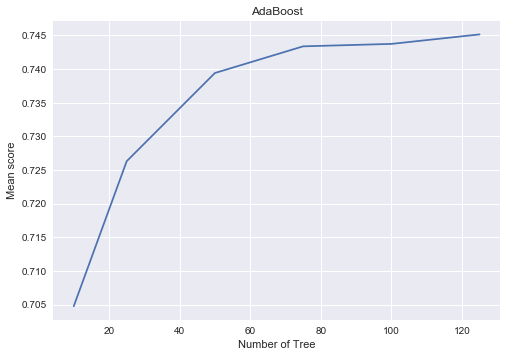

Parameters of  AdaBoost  giving the best R-Squared :  {'n_estimators': 125}


In [45]:
# Grid search to optimize regressor hyperparameters

from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

# Data Standardization
X = preprocessing.scale(X0.as_matrix()) 
y = y0.as_matrix()

# list of hyperparameters
parameters0 = {'n_estimators':[10, 25, 50, 75, 100, 125]}
parameters = {'n_estimators':[10, 25, 50, 75, 100, 125], 'max_depth':[5, 10, 15, 20, 25]}

names = ["GradientBoosting", "RandomForest", "AdaBoost", ]

regressors = [GradientBoostingRegressor(random_state =0),
              RandomForestRegressor(random_state = 0),
              AdaBoostRegressor(base_estimator = DecisionTreeRegressor(random_state =0), random_state =0)]

# grid search for all regressors with this loop
for name, clf in zip(names, regressors):
    
    if name == 'AdaBoost':
        gridSearch = GridSearchCV(estimator = clf, param_grid = parameters0) 
    else:
        gridSearch = GridSearchCV(estimator = clf, param_grid = parameters) 
    gridSearch.fit(X, y)

    # reshape 'mean_test_score'
    scores = gridSearch.cv_results_['mean_test_score']
    if name == 'AdaBoost':
        scores = np.array(scores)
    else:
        scores = np.array(scores).reshape(len(parameters['max_depth']),len(parameters['n_estimators']))
        
    # plot test score vs. parameters
    if name == 'AdaBoost':
        plt.plot(parameters0['n_estimators'],scores)
        plt.xlabel('Number of Tree')
        plt.ylabel('Mean score')
        plt.title(name)
        plt.show()
    else:    
        for ind, i in enumerate(parameters['max_depth']):
            plt.plot(parameters['n_estimators'], scores[ind], label='MaxDepth: ' + str(i))
        plt.legend()
        plt.xlabel('Number of Tree')
        plt.ylabel('Mean score')
        plt.title(name)
        plt.show()

    # parameters showing the best score
    rank = gridSearch.cv_results_['rank_test_score']
    rankMin_row = rank.argmin()
    param = gridSearch.cv_results_['params']
    print('Parameters of ', name, ' giving the best R-Squared : ',param[rankMin_row])

## <span style="color:red"> Final accuracy values of three classifiers

<span style="color:red"> 10-fold cross validation will be used to calculate the r-squared value using the hyperparameters that are optimized above.  R-squared values for each regressor will be printed to evalue the performance of the regressors.

GradientBoosting , R-Squared Average: 
 0.782006859234

R-Squared Standard Deviation: 
 0.01928599932

Elapsed time for  GradientBoosting  is  1.4  minutes


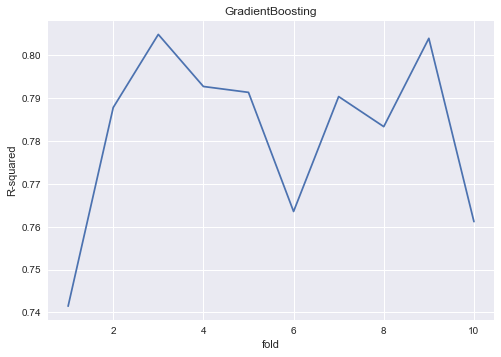

RandomForest , R-Squared Average: 
 0.758456763897

R-Squared Standard Deviation: 
 0.0157327600045

Elapsed time for  RandomForest  is  4.6  minutes


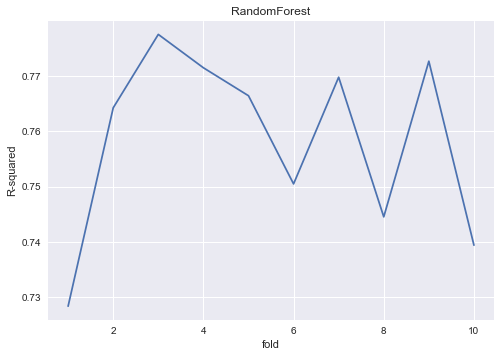

AdaBoost , R-Squared Average: 
 0.761666345792

R-Squared Standard Deviation: 
 0.0189329626249

Elapsed time for  AdaBoost  is  7.3  minutes


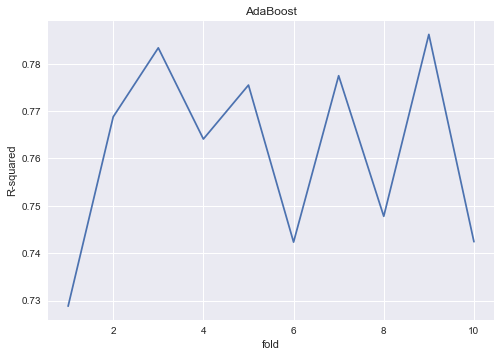

In [46]:
# k-fold cross validation
from sklearn.model_selection import KFold

# Define predictor and outcome variables
X = X0.as_matrix()
y = y0.as_matrix()

# Cross validation object
cv_object = KFold(n_splits = 10, shuffle = True, random_state = 0)


# Regressor
names = ["GradientBoosting", "RandomForest", "AdaBoost"]

regressors = [GradientBoostingRegressor(n_estimators = 125, max_depth = 5, loss = 'ls', random_state =0),
              RandomForestRegressor(n_estimators = 75, max_depth = 20, random_state = 0),
              AdaBoostRegressor(base_estimator = DecisionTreeRegressor(random_state =0), n_estimators = 75, random_state =0)              ]

result_final = np.zeros((len(names), 3)) # table collecting R-SQUARED and calculation time

# loop for three classifiers
j = 0;
for name, regressor in zip(names, regressors):
    t = time.time()  # time recording for each classifiers
    
    # Result table prep
    model_score_col = ['Rsquare']
    model_score = np.zeros((num_cv_iterations, len(model_score_col)))


    # CV iteration number
    i = 0
    for train_indices, test_indices in cv_object.split(X,y): 

        X_train = X[train_indices]
        y_train = y[train_indices]

        X_test = X[test_indices]
        y_test = y[test_indices]

        # Standardization
        scl_obj = StandardScaler()
        scl_obj.fit(X_train) 

        X_train_scaled = scl_obj.transform(X_train)                  
        X_test_scaled = scl_obj.transform(X_test) 

        # Train & Predict
        regressor.fit(X_train_scaled, y_train)
        r2 = regressor.score(X_test_scaled, y_test)         # r-square value

        # Result table
        model_score[i, :] = r2                         # Collect prediction outputs

        i += 1

    # print 10-fold result average
    score_positive = model_score[model_score>0]   # Select positive R-Squared values only
    
    score_mean = score_positive.mean(axis = 0)
    print(name, ', R-Squared Average: \n',score_mean)

    score_std = score_positive.std(axis = 0)
    print('\nR-Squared Standard Deviation: \n',score_std)

    elapsed = time.time() - t
    print('\nElapsed time for ',name, ' is ', round(elapsed/60, 1), ' minutes')
    
    # plot 10-fold R-Squared
    plt.plot(np.arange(1,11),model_score)
    plt.xlabel('fold')
    plt.ylabel('R-squared')
    plt.title(name)
    plt.show()

    # collect final average results
    resultAvg = np.append(np.append(score_mean, score_std), elapsed)
    result_final[j] = resultAvg
    j += 1

# <font color = red> Modeling and Evaluation 4: R-Squared Value

<font color = red> Three classifiers shown below are utilized to predict change in revenue value.  The hyperparameters for each regressor as shown below are found by trying multiple combinations of parameter values.  Some hyperparameter are manually selected based on the grid search plots insteaad of just taking the parameters giving maximum values because some cases increase marginal differences with additional number of trees or depth of the tree.

- <font color = red>  GradientBoostingRegressor(n_estimators = 125, max_depth = 5, loss = 'ls', random_state =0),
- <font color = red>  RandomForestRegressor(n_estimators = 75, max_depth = 20, random_state = 0),
- <font color = red>  AdaBoostRegressor(base_estimator = DecisionTreeRegressor(random_state =0), n_estimators = 75, random_state =0)

<font color = red> The average **r-squared values** are found by 10-fold cross validation.  **The r-squared values for Gradient Boosting, Random Forest, and AdaBoost regression models were 0.78, 0.75, 0.76 accordingly.**  Please see below graphs for the r-squared values. 

<font color = red> **The r-squared values of about 0.76 is decent with a real world data.**  This means that the 76% of variance in the response variable can be explained by this model.  If telecom companies predict the revenue change of each individual then they can predict the total company revenue easily by summing up individual revinue.  Companies can react fast to the future revenue by using a prediction model.  By predicting individual billing charges, companies can help customers who do not want an unwanted over-charge or suggesting an upgrade plan beforehand they issue a final bill.  To help and notify customers or to predict company total revenue, companies need to make separate regression models for each input features of this regression model so that the companies can predict the input features and then they can predict the change in revenue using this regression model.  

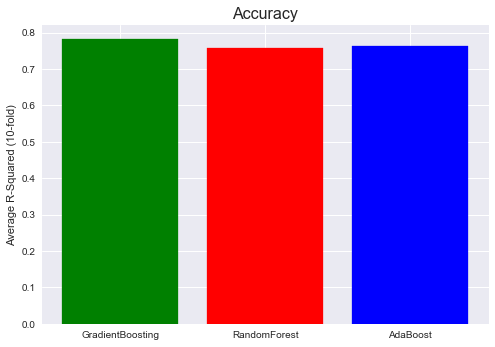

In [47]:
# Regressor R-squared Value Outputs
r_squared = result_final[:,0] # average output of 10-fold CV

# R-squared plot
x = [1,2,3]
barlist = plt.bar(x, r_squared)
barlist[0].set_color('g')  # manual color scheme (relatively, r=bad, b=okay, g=good)
barlist[1].set_color('r')
barlist[2].set_color('b')
plt.xticks(x, names)
plt.ylabel('Average R-Squared (10-fold)')
plt.title('Accuracy', fontsize=16)
plt.show()

# <font color = red> Modeling and Evaluation 5: Model Comparison

<font color = red> **There were noticeable differences in train and test time among regressors.**  As the bar graph shown below, the modeling time (train and test time for 10-fold cross validation with our dataset(36345, 15)) was differernt.  Random Forest was more than twice slower than the Gradient Boosting, and AdaBoost(w/Decision Tree) was more than four times slower than the Gradient Boosting.   After the below graph, individual paired t-test was performed to see the significance in the difference of average r-squared values. The **t-test** result shows that there is no significant difference in average r-squared values from any combination of the regressor because the **p-value** were all much greater than 0.05.  In other words, **we are 95% confident that the r-squared values are not different.**

<font color = red> There are too opposite characteristics of models which gives high errors. Some models are too complex and have low bias but large variance, and other models are too simple so that they have large bias but low variance.   RandonForest runs based on bagging or bootstrap aggregation of DecisionTree models, which means RandomForest generates multiple DecisionTree models using bootstrap samples from original dataset.  The reason of doing bagging is it reduces the model variances (overfitting) while keeping the low bias as a complex model.  AdaBoost and GradientBoosting use no bagging but boosting which boost weak learners to strong learners.  Boosting reduces bias of not complex models while keeping low variance.  

<font color = red> Regardless of the logics of each model, the three regressors are showing same r-square values with different processing time.  Thus, the model with the low processing time is better.  Then, **the best regressor that is fit to our dataset is GradientBoosting.**  

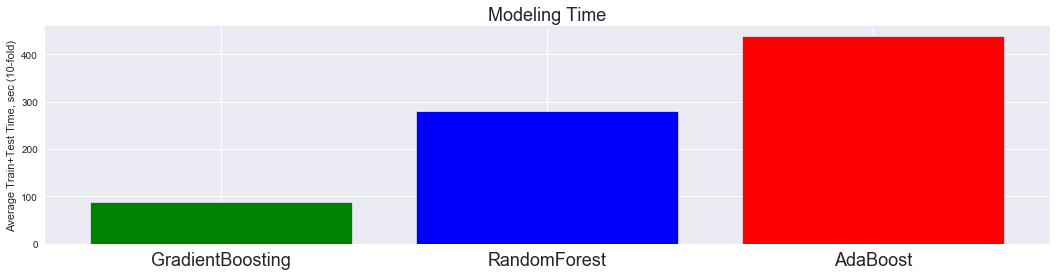

Modeling Time relative to Decision Tree =  [ 1.          3.20388316  5.03216173]


In [48]:
# Classifier Performance Outputs

# Elapsed Time plot
elapseTime = result_final[:,2]
plt.figure(figsize = (18,4))
x = [1,2,3]
barlist = plt.bar(x, elapseTime)
barlist[0].set_color('g') # manual color scheme (relatively, r=bad, b=okay, g=good)
barlist[1].set_color('b')
barlist[2].set_color('r')
plt.xticks(x, names, fontsize=18)
plt.ylabel('Average Train+Test Time, sec (10-fold)')
plt.title('Modeling Time', fontsize=18)
plt.show()

print('Modeling Time relative to Decision Tree = ',  elapseTime/elapseTime[0])

In [49]:
# t-test for each pair of three R-Squared values
from scipy.stats import ttest_ind_from_stats

for i in range(0,3):
    j = i+1
    if j ==3:
        j = 0

    # Compute the descriptive statistics of a and b.
    abar = result_final[i,0]
    avar = result_final[i,1]
    na = 10
    adof = na - 1

    bbar = result_final[j,0]
    bvar = result_final[j,1]
    nb = 10
    bdof = nb - 1

    # Use scipy.stats.ttest_ind_from_stats.
    t2, p2 = ttest_ind_from_stats(abar, np.sqrt(avar), na,
                                  bbar, np.sqrt(bvar), nb,
                                  equal_var=False)
    print('\nROC R-Squared value Comparison Test for', names[i], 'and', names[j])
    print("ttest_ind_from_stats: t = %g  p = %g" % (t2, p2))


ROC R-Squared value Comparison Test for GradientBoosting and RandomForest
ttest_ind_from_stats: t = 0.397963  p = 0.695386

ROC R-Squared value Comparison Test for RandomForest and AdaBoost
ttest_ind_from_stats: t = -0.0545128  p = 0.957132

ROC R-Squared value Comparison Test for AdaBoost and GradientBoosting
ttest_ind_from_stats: t = -0.32902  p = 0.745938


# <font color = red> Modeling and Evaluation 6: Most Important Feature


<font color = red> The most important features are selected using the GradientBoosting regressor, which showed the highest r-squared value with lowest processing time.  Recursive feature elimination(RFE) method is utilized to rank features.  RFE recursively find the feature importance using a regressor by eliminating the least important feature at a time.

<font color = red> **The most important feature using the GradientBoosting regressor to the r-squared value was 'change_mou'** feature which tells about how much usage is increased in minutes in current month over last three month average.  The correlation of coefficient between the 'change_mou' and 'change_rev' is 0.68, which is shown below, so it make sense why the feature 'change_mou' is the most important feature to the change in revenue.  Including the 'change_mou', the top three most important variable shown below all represent some changes over last months.  Unlike most important feature('change_mou'), the minute of use('mou_Mean') or number of phones('phones') for example, are not considered much associated since these features are not indicate any changes.  

| GradientBoosting Rank | Attribute       |  Definition                                                                                                                                                                                                                                                                 |
|------------|-----------------|:---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| 1          | change_mou         | Percentage change in monthly minutes of use vs previous three month average.                                                           |
| 2          | ovrrev_Mean        | Mean overage revenue.                                                         |
| 3          | avg3rev            | Average monthly revenue over the previous three months |

In [50]:
# RFE Feature Importance and Corr.Coef w/Churn

from sklearn.feature_selection import RFE

# regressor
estimator = GradientBoostingRegressor(n_estimators = 125, max_depth = 5, loss = 'ls', random_state =0)

# dataset: total attributes with drop NaN
X = preprocessing.scale(X0.as_matrix())  # standardization
y = y0.as_matrix()

# feature selection

featureTotal = 1

# estimator = ... #defined above
selector = RFE(estimator, featureTotal, step = 1)  
selector = selector.fit(X, y) 

# # Feature Rank
rankTable = pd.DataFrame([X0.columns.values,selector.ranking_]).T
rankTable.columns = ['Attributes','Rank']
rankTable_sort = rankTable.sort_values(by = 'Rank', axis = 0, ascending = True)
print(rankTable_sort)

# Corr.Coef: change_rev vs. [change_mou, ovrrev_Mean, avg3rev]
print('\nCorr.Coef: change_rev vs. [change_mou, ovrrev_Mean, avg3rev]')
print(np.corrcoef([y0, X0.change_mou, X0.ovrrev_Mean, X0.avg3rev]))

       Attributes Rank
4      change_mou    1
2     ovrrev_Mean    2
11        avg3rev    3
1     totmrc_Mean    4
0        mou_Mean    5
3       roam_Mean    6
14    Customer_ID    7
10         avgqty    8
9          adjrev    9
6   mou_peav_Mean   10
13        eqpdays   11
5   ccrndmou_Mean   12
8          totmou   13
7   drop_blk_Mean   14
12         phones   15

Corr.Coef: change_rev vs. [change_mou, ovrrev_Mean, avg3rev]
[[ 1.          0.68760525  0.01251346 -0.36789495]
 [ 0.68760525  1.          0.01201259 -0.24588005]
 [ 0.01251346  0.01201259  1.          0.75405352]
 [-0.36789495 -0.24588005  0.75405352  1.        ]]


# <font color = red> Deployment of Task 2: Regression </font>
With all of the revenue related fields in our data set, it is very tempting to leverage it to regress over change_rev in addition to having used it for churn classification.  And on the surface the most important features identified for the regression task (change_mou, ovrrev_Mean, mou_Mean, roam_Mean, and etc.) make a lot of sense.  However that granularity of these fields and our data set at large don’t support very strong prediction of the changing revenue behavior on a monthly basis.  Telephone usage is seasonal with large spikes during holiday periods.  And while we may be able to on average project reasonable values for monthly revenue and change in revenue, we would not be able to handle the seasonality nor gradual changes in revenue driving behavior with our data set. And our predictions would tend to have intolerably wide confidence intervals as a result.  In order to do this task well, the data that would be important would monthly values for revenue and usage (MOU) for a few years as opposed to a single record per customer with averages on the 3 month and 6 month basis for usage and revenue.   It is very likely that the dataset we used is in fact build on a monthly basis and historical copies of it over 25 months would provide the basis for very strong regression analysis over revenue and change in revenue values.